<a href="https://colab.research.google.com/github/IfrazQazi/Appliances-Energy-Prediction-Capstone_Project/blob/main/Appliances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data-driven prediction of energy use of appliances**
##The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).
date time year-month-day hour:minute:second
 
Appliances, energy use in Wh (Dependent variable) 

lights, energy use of light fixtures in the house in Wh


T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius

RH2,Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius 

RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH8,Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in Celsius 

Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (fromChievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

#**bjective of Project:**


* The increasing trend in energy consumption is becoming cause of concern for the entire world, as the energy consumption is increasing year after year so is the carbon and greenhouse gas emission, the majority portion of the electricity generated is consumed by industrial sector but a considerable amount is also consumed by residential sector.

* It is important to study the energy consuming behaviour in the residential 
sector and predict the energy consumption by home appliances as it consume maximum amount of energy in the residence. This project focuses on predicting the energy consumption of home appliances based on humidity and temperature.

#**Tentative Roadmap to Follow:**
## Loading the dataset.

## cleaning and transforming of features (Null value treatment, Data type consistency check).

## Descriptive statistical analysis.
## Skewness and outlier (anomalies) detection analysis.
## Feature engineering (standardizing, normalizing, multicolinearity assumption check, linearity between independent and dependent variable check).
## Exploratory data analysis(understanding the patteren and behaviour of data. EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better).
## Understanding the feature importance (PCA can be handy for feature selection, lasso regression can be a another option).
## Model Selection.
## Model Training.
## Model Evaluation.
## Conclusion.

## First importing libraries and mounting google drive.
## loading data into data frame

In [ ]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stat
import pylab
import missingno as mno
from statsmodels.stats.outliers_influence import variance_inflation_factor
## ML Library
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading Appliances Energy Prediction data into data frame
path='/content/drive/MyDrive/AlmaBetter/ML capstone project regression/data_application_energy.csv'
energyP_df=pd.read_csv(path)

In [ ]:
# head of dataframe
energyP_df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
energyP_df.tail()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  34.118851  34.118851

[5 rows x 29 columns]

In [ ]:
# shape of dataframe
energyP_df.shape


(19735, 29)

##Above dataframe is having 19735 rows and 29 columns.
## No categorical features.
##And target variable is Appliances column.

In [ ]:
energyP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## We can see that almost all columns are numeric data type.
## only one column is object data type

## lets check if there is null values in our dataset

In [ ]:
# checking if there is any null value in dataset
energyP_df.isnull().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

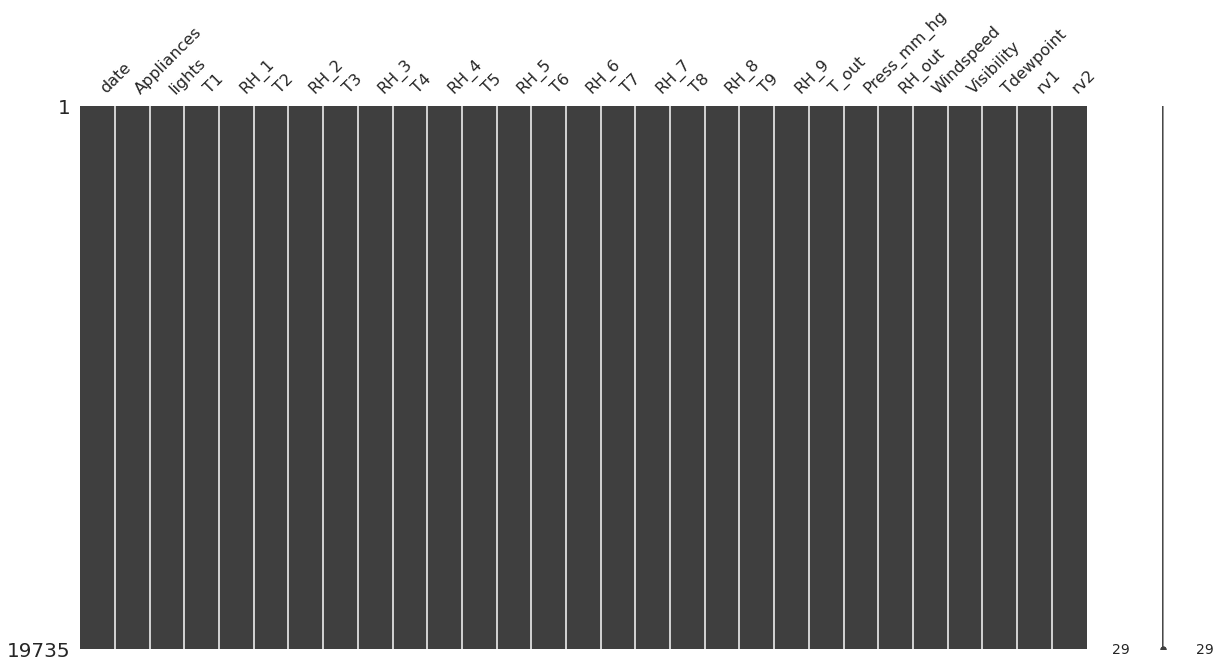

In [ ]:
# missing value
mno.matrix(energyP_df, figsize = (20, 10))

## as we can see from above output there is no null value in this data set

In [ ]:
# lets see is there any duplicate row in dataset
energyP_df.duplicated().any()

False

## there is no duplicate value in dataframe

In [ ]:
# extracting year from date column
energyP_df['year']=pd.DatetimeIndex(energyP_df['date']).year

In [ ]:
# lets see the count of years
energyP_df.groupby(['year'])['year'].count()

year
2016    19735
Name: year, dtype: int64

## as we can see here that this data is from one year
## so i don't think that we need year so i am drop year column from dataframe

In [ ]:
# droping year column from dataset
energyP_df.drop('year',axis=1,inplace=True)

In [ ]:
# extracting month from date column
energyP_df['month']=pd.DatetimeIndex(energyP_df['date']).month

In [ ]:
# extracting day from date column
energyP_df['day']=pd.DatetimeIndex(energyP_df['date']).weekday

In [ ]:
# converting date column into datatime data type

energyP_df['date'] = pd.to_datetime(energyP_df['date'])


In [ ]:
energyP_df['day_name']=energyP_df['date'].dt.strftime('%A')

## so now we have successfully extracted the month and day from date column

In [ ]:
#to get hour and minute
energyP_df['time']=energyP_df['date'].dt.strftime('%H')

##**So now we have successfully extractred month,day,time from date column so now we can drop date column**

In [ ]:
# droping date column
energyP_df.drop('date',axis=1,inplace=True)

## renaming column name for better understanding

In [ ]:
# creating dictionary of temperature features
temp_dict = {
    'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'
}

In [ ]:
# renaming temperature features in dataset
energyP_df = energyP_df.rename(columns=temp_dict)

In [ ]:
# creating dictionary of humidity features
humid_dict = {
    'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
    'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
    'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'
}

In [ ]:
# renaming humidity feature
energyP_df = energyP_df.rename(columns=humid_dict)

In [ ]:
energyP_df.head()

Appliances  lights  temp_kitchen  ...  month  day  day_name
0          60      30         19.89  ...      1    0    Monday
1          60      30         19.89  ...      1    0    Monday
2          50      30         19.89  ...      1    0    Monday
3          50      40         19.89  ...      1    0    Monday
4          60      40         19.89  ...      1    0    Monday

[5 rows x 31 columns]

In [ ]:
energyP_df.describe(include='all')

Appliances        lights  temp_kitchen  ...           day  day_name   time
count   19735.000000  19735.000000  19735.000000  ...  19735.000000     19735  19735
unique           NaN           NaN           NaN  ...           NaN         7     24
top              NaN           NaN           NaN  ...           NaN  Thursday     17
freq             NaN           NaN           NaN  ...           NaN      2880    828
mean       97.694958      3.801875     21.686571  ...      2.977249       NaN    NaN
std       102.524891      7.935988      1.606066  ...      1.985617       NaN    NaN
min        10.000000      0.000000     16.790000  ...      0.000000       NaN    NaN
25%        50.000000      0.000000     20.760000  ...      1.000000       NaN    NaN
50%        60.000000      0.000000     21.600000  ...      3.000000       NaN    NaN
75%       100.000000      0.000000     22.600000  ...      5.000000       NaN    NaN
max      1080.000000     70.000000     26.260000  ...      6.000000       NaN    NaN

[11 rows x 32 columns]

## **Visualisation**



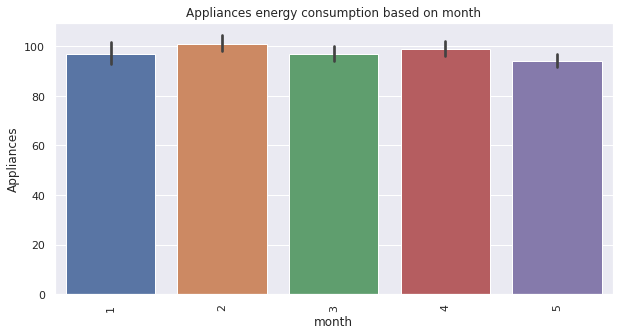

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

plt.title("Appliances energy consumption based on month")
sns.barplot(energyP_df.month, energyP_df.Appliances)
plt.show()

## From above graph we can see that the energy consumption for each month is approximately equal to

In [ ]:
# Appliances energy consumption per hour
a_time=energyP_df.groupby('time')['Appliances'].sum().reset_index()


In [ ]:
# line graph for energy consumption of appliances
fig = go.Figure(data=[go.Line(
            x=a_time.time, y= a_time.Appliances,
            text=a_time.time,
           
            
        )])
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Energy consumption",
    title_text="Energy consumption per hour",
)

fig.update_xaxes(type='category')

fig.show()

## as we can see from above line graph that use of appliances energy consumption is more in day time as compare to night

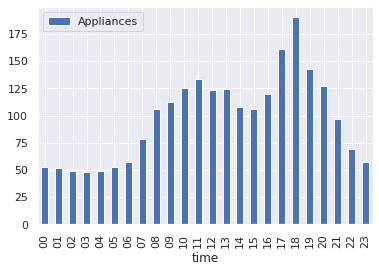

In [ ]:
# average energy consumption of appliances
energyP_df.groupby('time').agg({'Appliances' : 'mean'}).plot.bar()

## from above bar plot we can see that the peak hour is 6PM.
## and we can see that from 10PM-6AM the energy consumption of appliances is very low which is around 50wh.

In [ ]:
# creating dataframe of avg temperature 
avg_temp=energyP_df.groupby('month').agg({temp:'mean' for i ,temp in enumerate(temp_dict.values())}).reset_index()


In [ ]:
# plot for avg temperature 
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_living'], name="temp_living"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_laundry'], name="  temp_laundry"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_office'], name="temp_office "))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_bath'], name="temp_bath "))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_kitchen'], name="temp_kitchen"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_iron'], name="temp_iron "))

fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_teen'], name="temp_teen"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_parents'], name="temp_parents"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_station'], name="temp_station"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_outside'], name="temp_outside"))

fig.update_layout(
    autosize=True,
    width=600,
    height=500,
    xaxis_title="month",
    yaxis_title="Temperature in celcius",
    title_text="average Temperature every month",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



## the variance of temperatures inside the building is low, since the temperature inside is controlled. Although the increase temperature seem to have no impact on the appliance consumtion patterns.we can also observe that significant increase of temperature over the course of 5 months strating from 3-4 degree celcius in january to 14-15 degree celcius in month of may.
## outside temperature and station temperature is low in the month of january  because of winter and high temperature in the month of may becuase of summer

In [ ]:
# average humidity per month
avg_humid=energyP_df.groupby('month').agg({temp:'mean' for i ,temp in enumerate(humid_dict.values())}).reset_index()


In [ ]:
# plot for avg humidity 
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_kitchen'], name="humid_kitchen"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_living'], name="  humid_living"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_laundry'], name="humid_laundry "))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_office'], name="humid_office "))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_bath'], name="humid_bath"))

fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_iron'], name="humid_iron"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_teen'], name="humid_teen"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_parents'], name="humid_parents"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_station'], name="humid_station"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_outside'], name="humid_outside "))


fig.update_layout(
    autosize=True,
    width=600,
    height=500,
    xaxis_title="month",
    yaxis_title="Himidity",

    title_text="average humidity every month",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



##we can see from above graph the humidity outside building tend to decrease over months, the humidity inside rooms seem to be unaffected. The humidity levels outside seem to be negatively correlated to with the temperature levels outside.

In [ ]:
# average temperature every day
avg_temp_day=energyP_df.groupby(['day_name','day']).agg({temp:'mean' for i ,temp in enumerate(temp_dict.values())}).reset_index().sort_values('day')

In [ ]:
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_kitchen'], name="temp_kitchen"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_living'], name="  temp_living"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_laundry'], name="temp_laundry "))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_office'], name="temp_office "))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_bath'], name="temp_bath"))

fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_iron'], name="temp_iron"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_teen'], name="temp_teen"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_parents'], name="temp_parents"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_station'], name="temp_station"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_outside'], name="temp_outside "))


fig.update_layout(
    autosize=True,
    width=700,
    height=500, 
    xaxis_title="Day",
    yaxis_title="Temperature in celcius",
    title_text="average temperature every day",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



## **As we can see that temperature of outside of the building is very low every as compare to inside building. The temperature inside the building is constant every day** 

In [ ]:
avg_humid_day=energyP_df.groupby(['day_name','day']).agg({temp:'mean' for i ,temp in enumerate(humid_dict.values())}).reset_index().sort_values('day')


In [ ]:
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_kitchen'], name="humid_kitchen"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_living'], name="  humid_living"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_laundry'], name="humid_laundry "))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_office'], name="humid_office "))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_bath'], name="humid_bath"))

fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_iron'], name="humid_iron"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_teen'], name="humid_teen"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_parents'], name="humid_parents"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_station'], name="humid_station"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_outside'], name="humid_outside "))


fig.update_layout(
    autosize=True,
    width=700,
    height=500,
    xaxis_title="day",
    yaxis_title="Humidity",
    title_text="average humidity every day",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



## From above plot as we can see that station's humidity is high every day as compared to the rest of the places. And humidity of iron is very low

In [ ]:
avg_energy_time=energyP_df.groupby(['day','time']).agg({'Appliances':'mean' }).reset_index()


In [ ]:

# average energy consumption every day
fig = px.bar(avg_energy_time, x="time", y="Appliances",hover_name = "time",
  animation_frame= avg_energy_time.day)
fig.update_layout(title_text="average energy consumption every day",transition = {'duration': 2000})

##A trend of high consumption hours for each day seems to be similar to the over all trend .Except on Friday as there is more energy consumption on that day

##**Handlig Outliers**

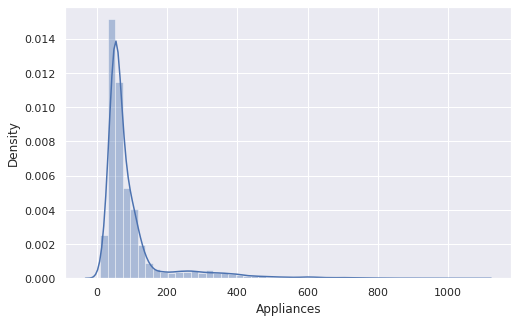

In [ ]:
# lets see the distribution of Appliances column
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(energyP_df.Appliances);

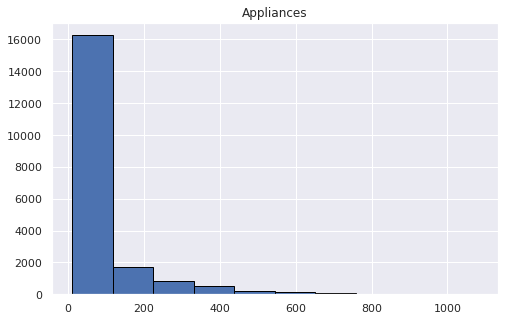

In [ ]:
energyP_df.hist(column='Appliances',edgecolor='black');

## we can see from above graph that this distribution is right skewed 

## so i am using log transformation

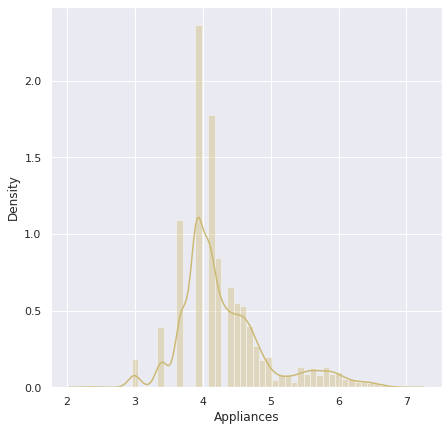

In [ ]:
# log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log(energyP_df['Appliances']),color="y")

In [ ]:
# Q-Q plot
def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

In [ ]:
# log transformation of  Appliances column
energyP_df['Appliances_log']=np.log(energyP_df['Appliances'])

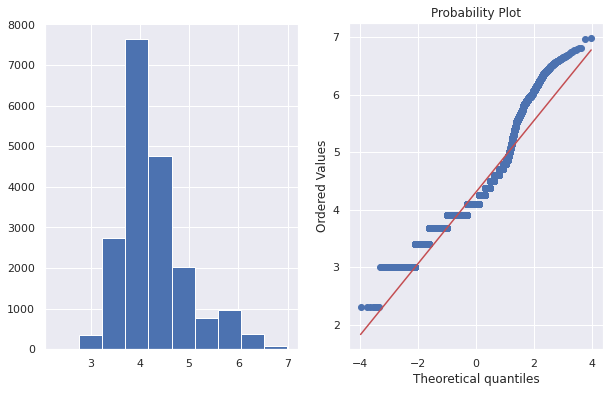

In [ ]:
plot_data(energyP_df,'Appliances_log')

In [ ]:
# square root transformation
energyP_df['Appliances_sqrt']=energyP_df['Appliances']**(1/2)

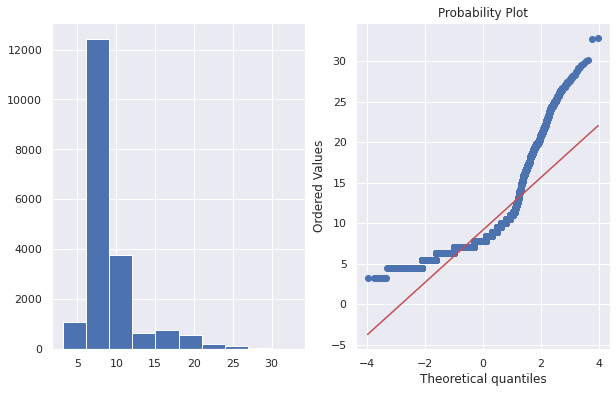

In [ ]:
plot_data(energyP_df,'Appliances_sqrt')

In [ ]:
energyP_df.drop('Appliances_sqrt',axis=1,inplace=True)

In [ ]:
# exponential transformation
energyP_df['Appliances_expo']=energyP_df['Appliances']*(1/1.2)

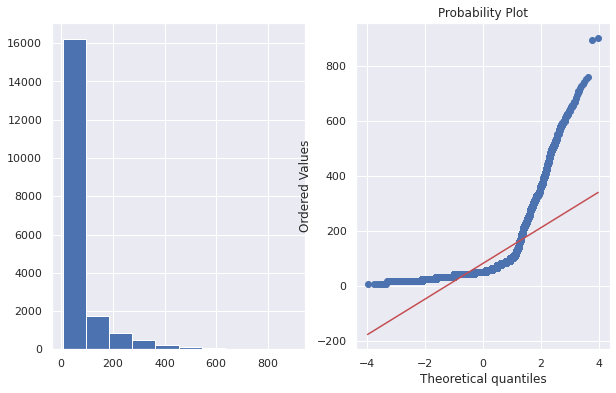

In [ ]:
plot_data(energyP_df,'Appliances_expo')

In [ ]:
energyP_df.drop('Appliances_expo',axis=1,inplace=True)

In [ ]:
energyP_df['Appliances_boxcox'],parameter=stat.boxcox(energyP_df['Appliances'])

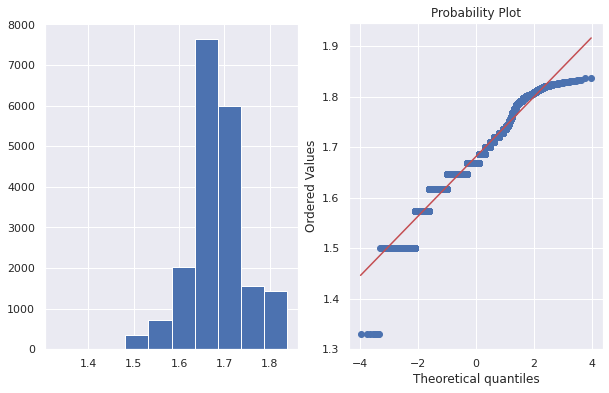

In [ ]:
plot_data(energyP_df,'Appliances_boxcox')

In [ ]:
energyP_df.drop('Appliances_boxcox',axis=1,inplace=True)

## after trying multiple transformation i have decided that to stick with log transformation

In [ ]:
# Droping Appliances column
energyP_df.drop('Appliances',axis=1,inplace=True)

In [ ]:
# changing data type of time column
energyP_df['time']=energyP_df['time'].apply(lambda x: int(x))

In [ ]:
energyP_df.head()

Appliances  lights  temp_kitchen  ...  month  day  day_name
0          60      30         19.89  ...      1    0    Monday
1          60      30         19.89  ...      1    0    Monday
2          50      30         19.89  ...      1    0    Monday
3          50      40         19.89  ...      1    0    Monday
4          60      40         19.89  ...      1    0    Monday

[5 rows x 31 columns]

In [ ]:
# selecting numeric features from data set
numeric_features = energyP_df.describe().columns

## Distribution of all features

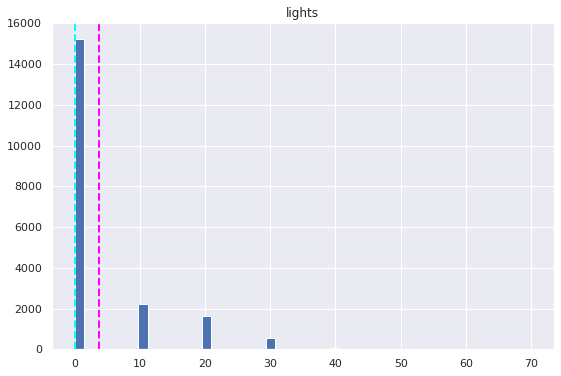

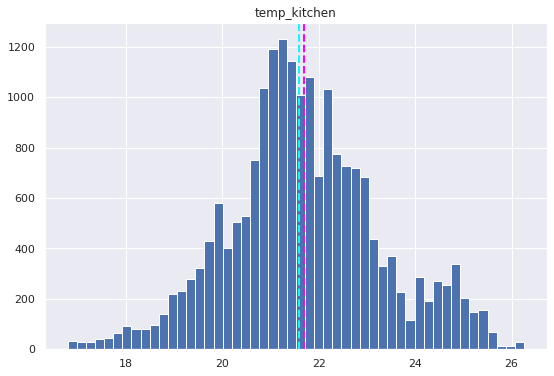

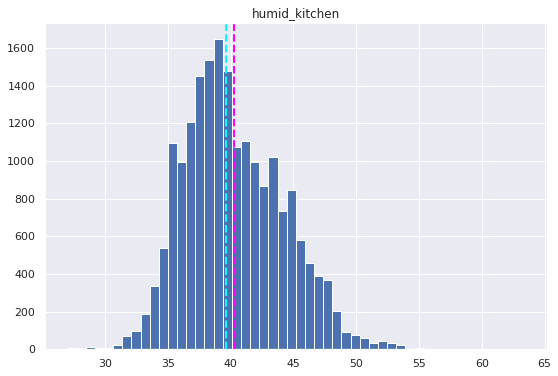

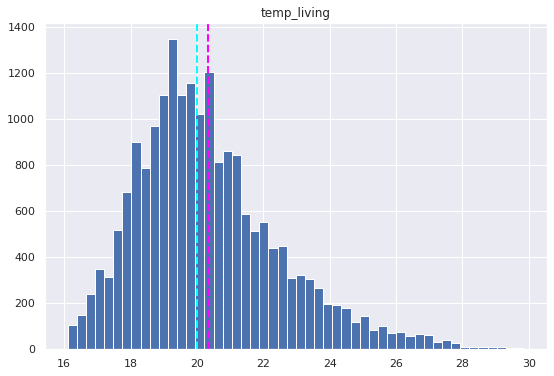

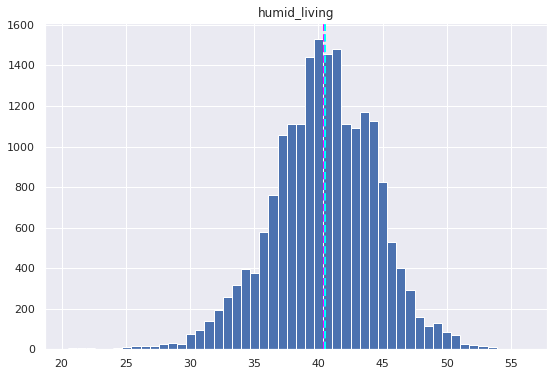

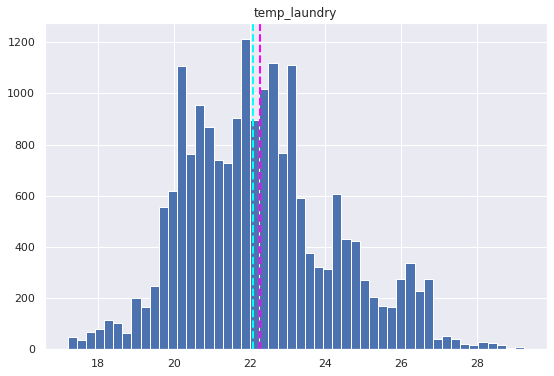

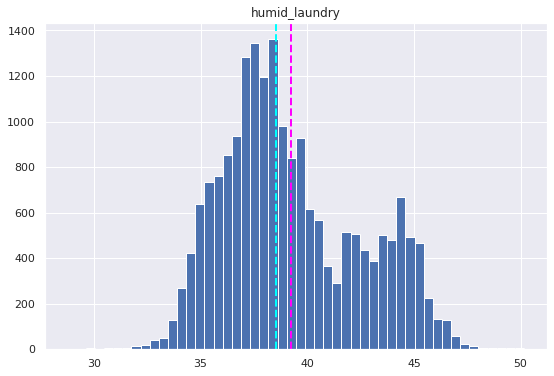

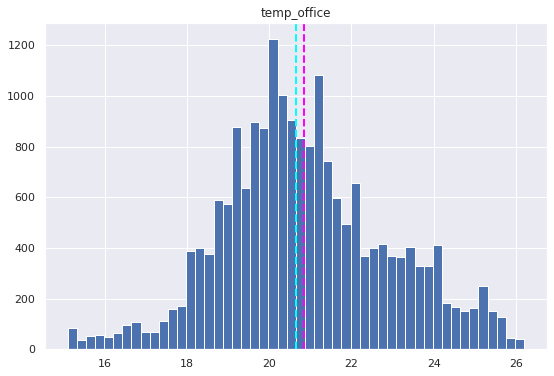

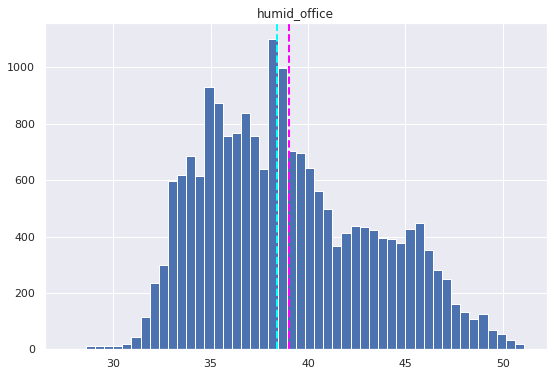

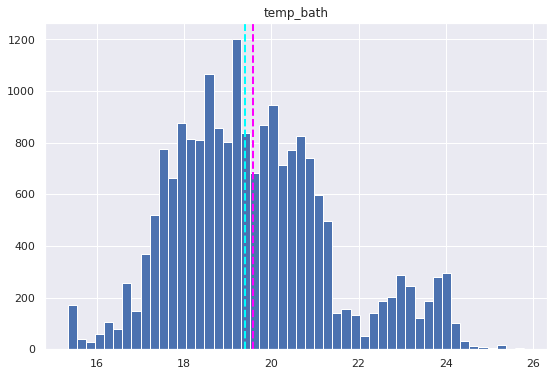

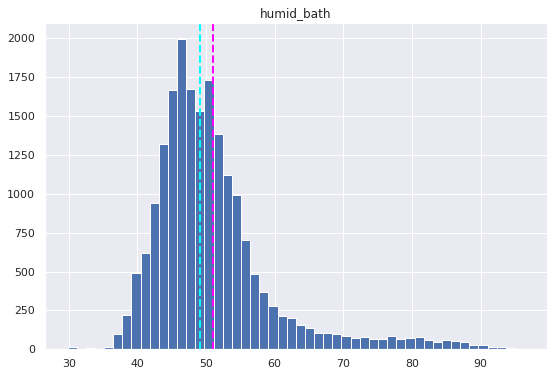

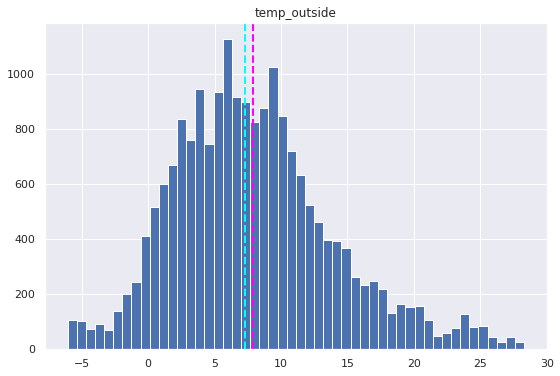

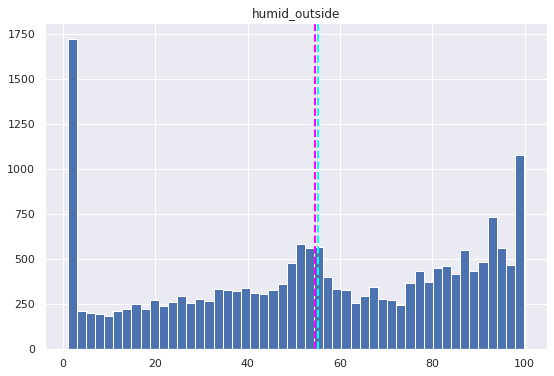

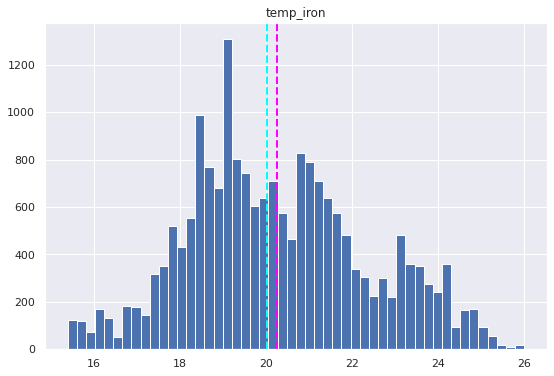

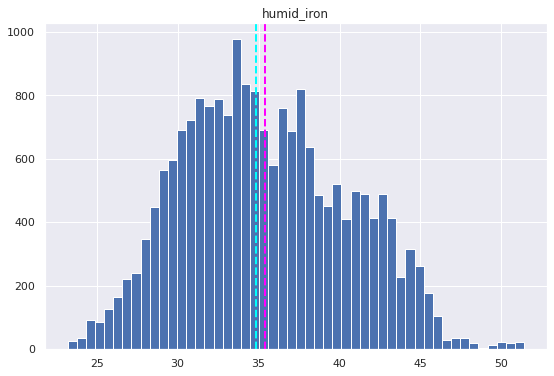

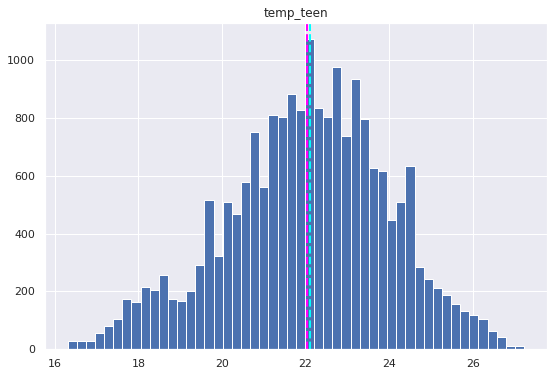

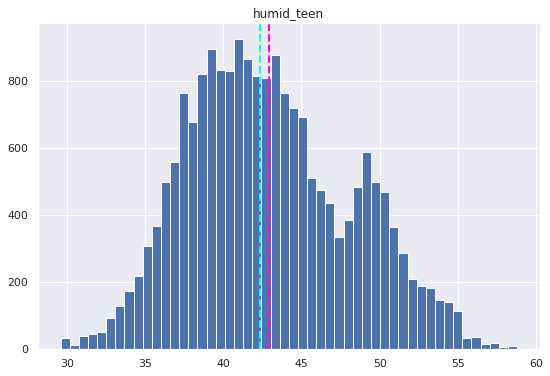

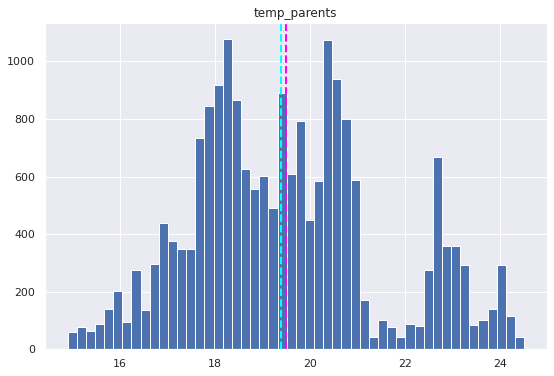

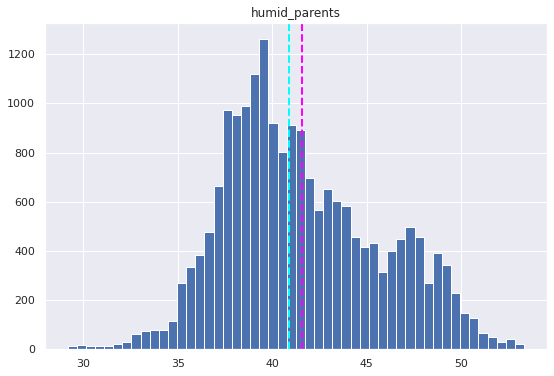

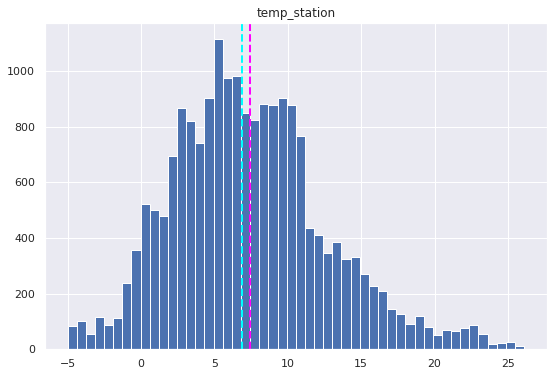

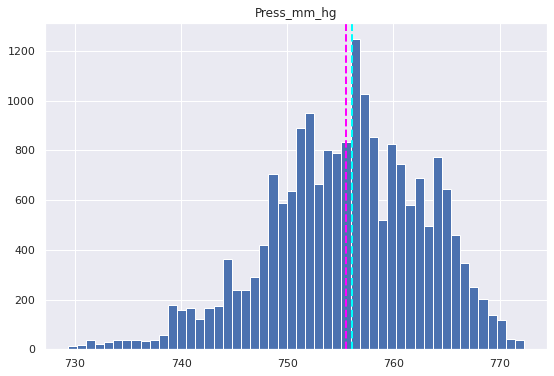

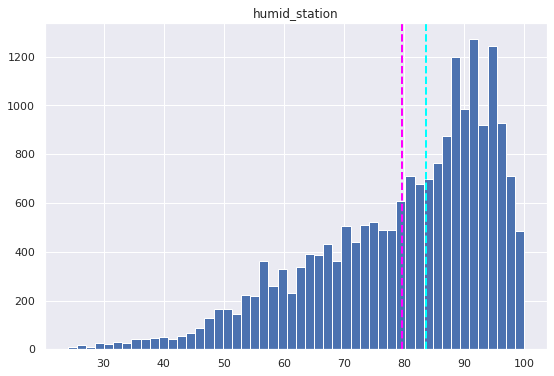

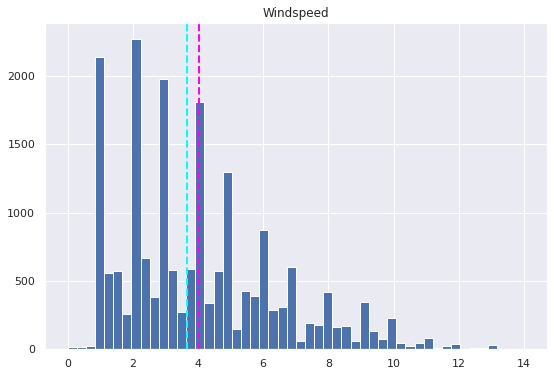

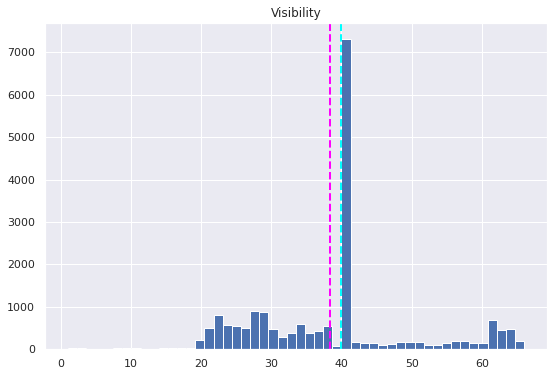

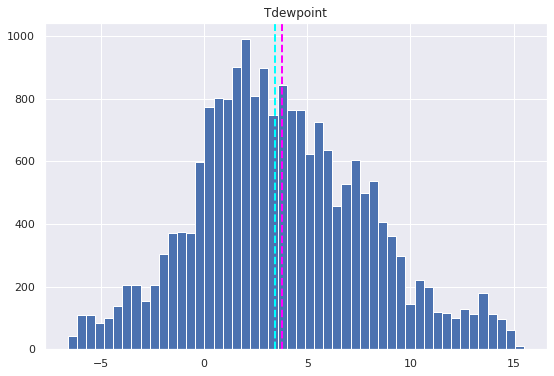

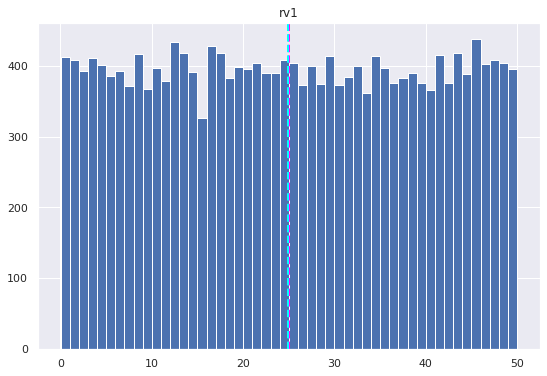

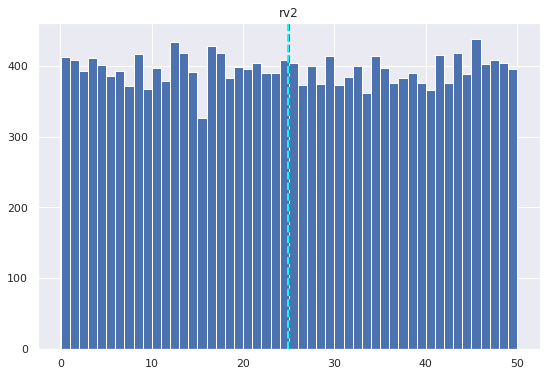

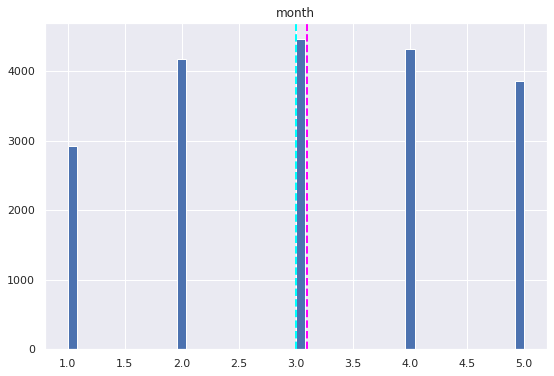

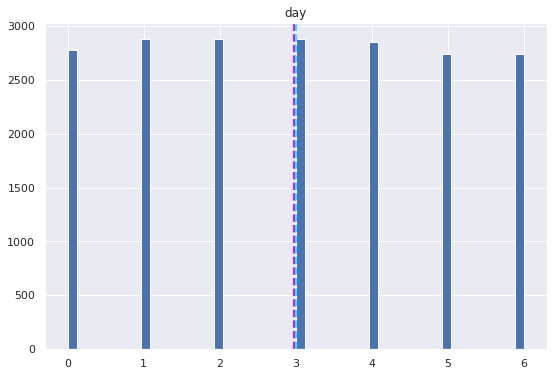

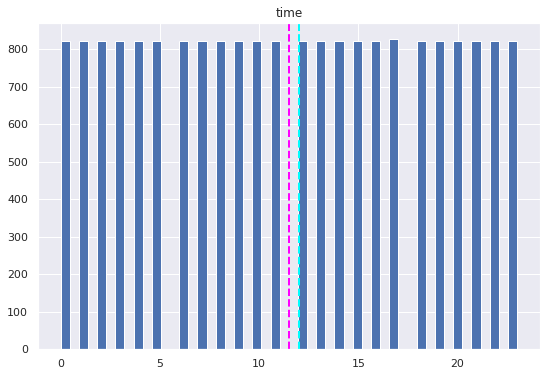

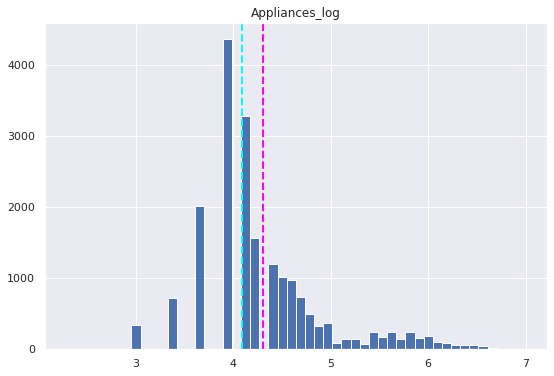

In [ ]:
# lets distribution of all columns
for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energyP_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# after observing above graphs we can say that many features are not normally distributed

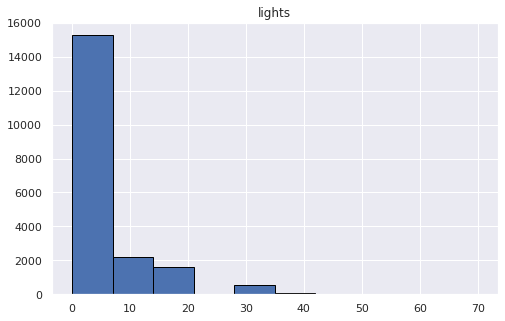

In [ ]:
energyP_df.hist(column='lights',edgecolor='black');

In [ ]:
energyP_df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

In [ ]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
energyP_df.drop('lights',axis=1,inplace=True)

## Droping lights column due to lot of zero enteries this column is of not much use and will be ignored in rest of the model


In [ ]:
#droping day_name column because we already have day_name as numeric
energyP_df.drop('day_name',axis=1,inplace=True)

In [ ]:
# selecting numeric features from data set
numeric_features = energyP_df.describe().columns


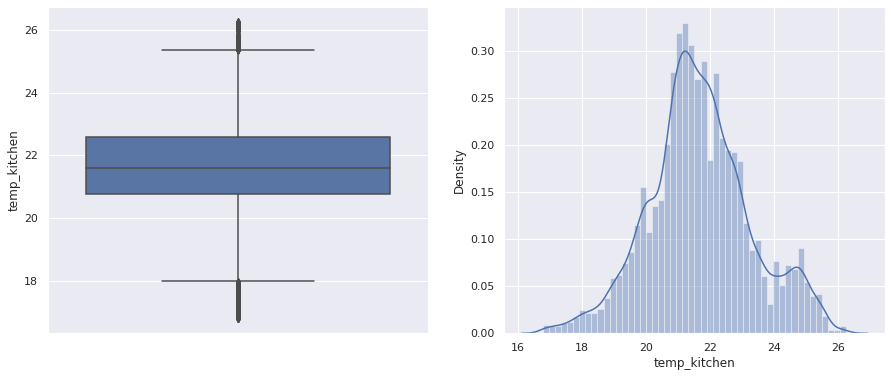

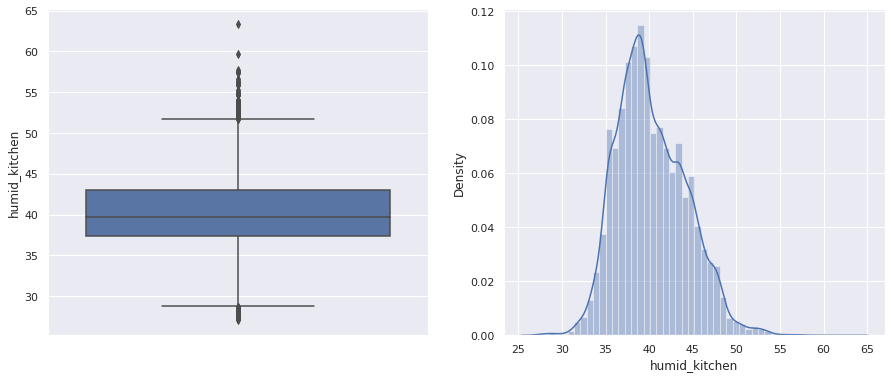

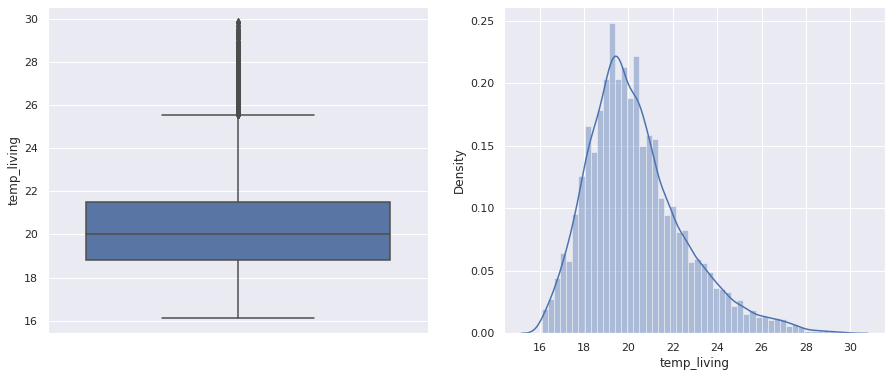

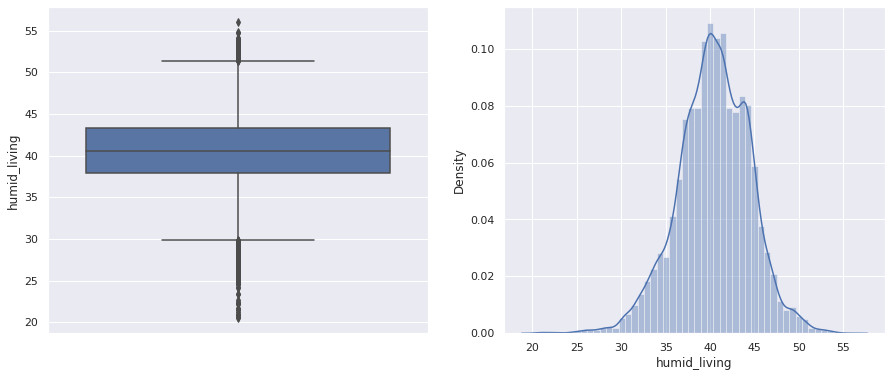

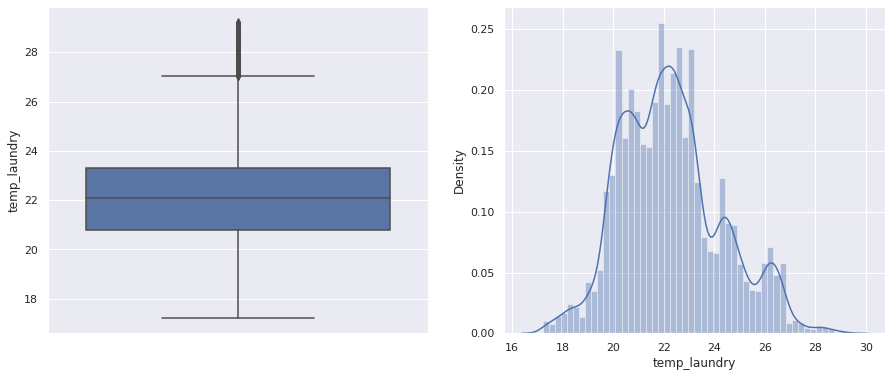

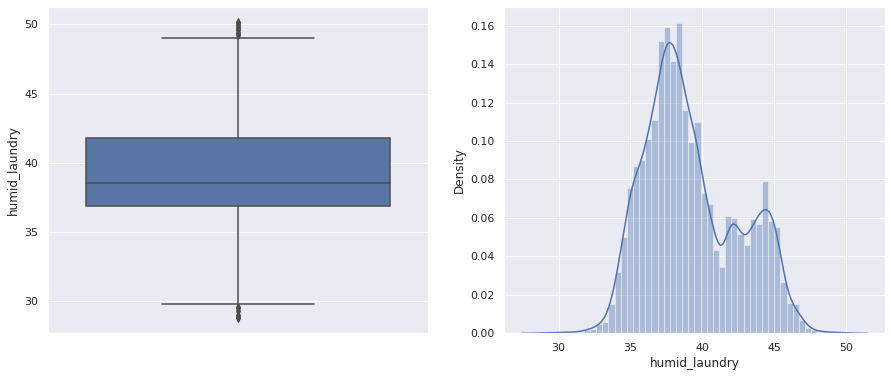

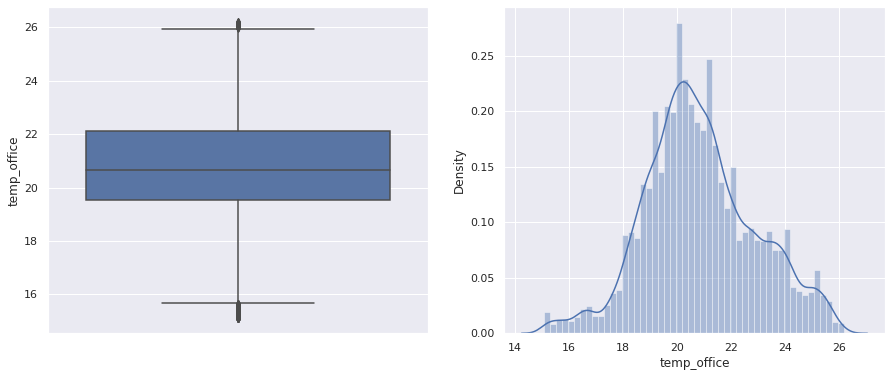

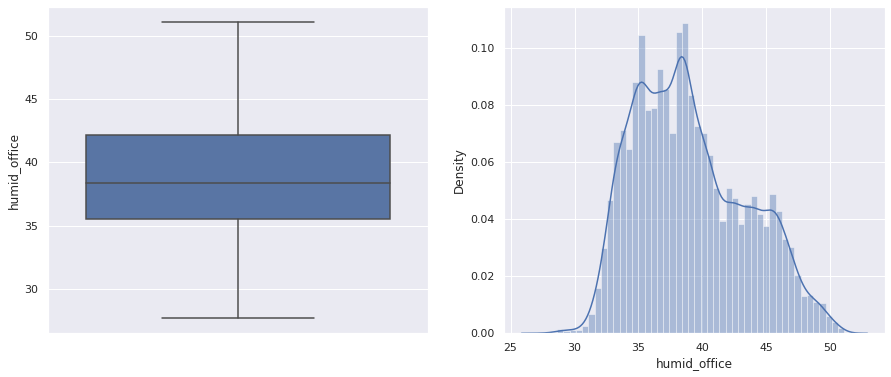

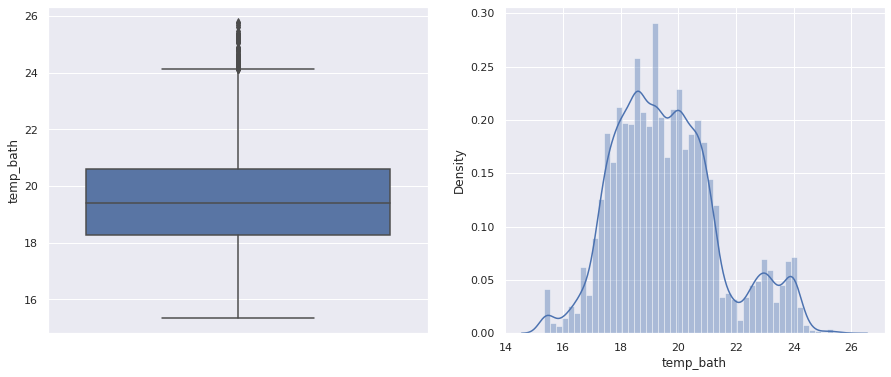

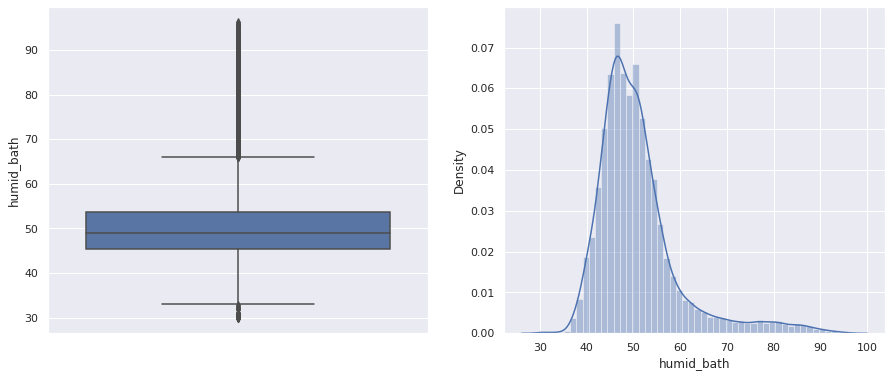

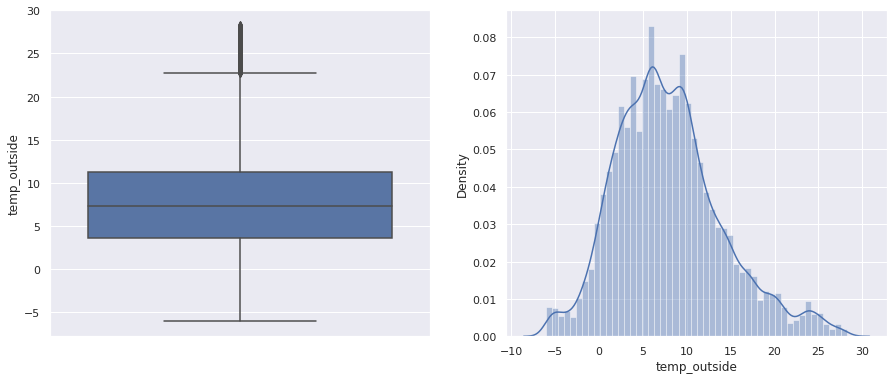

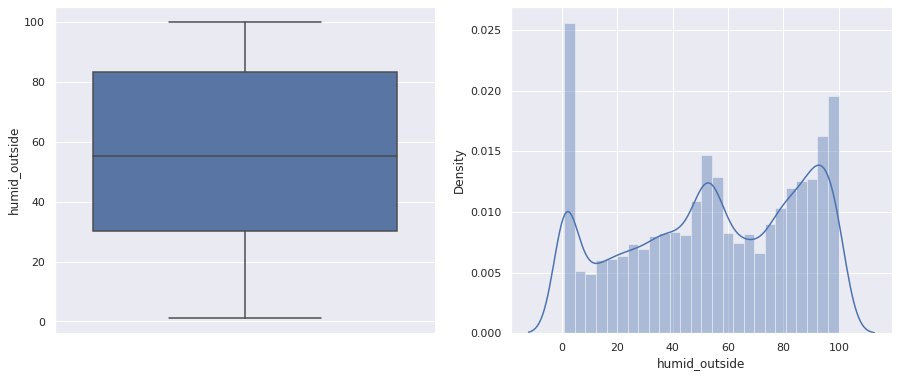

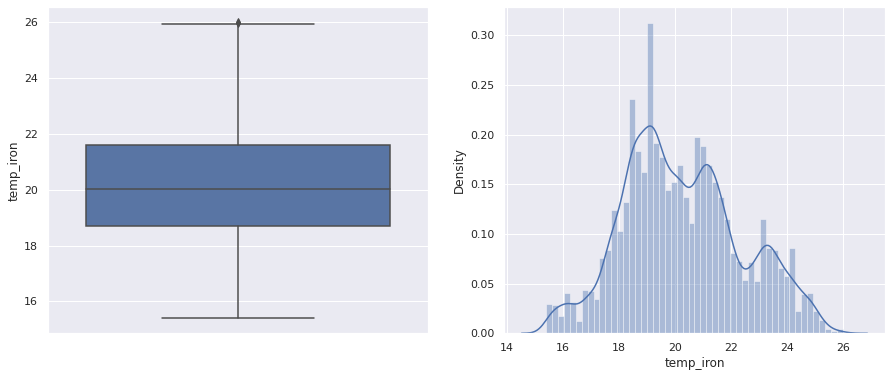

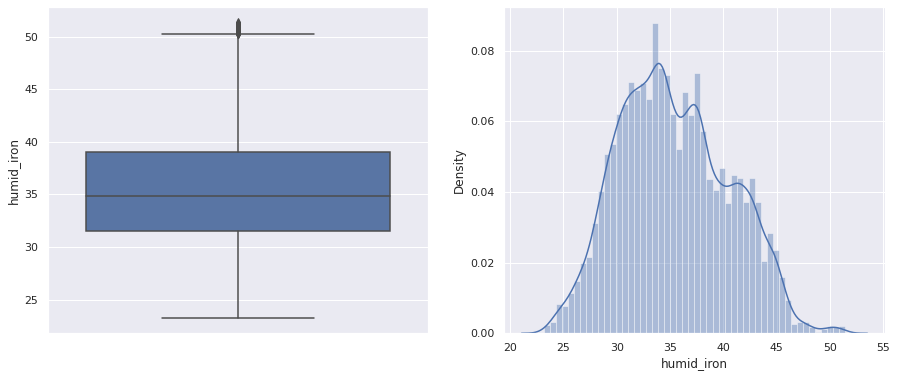

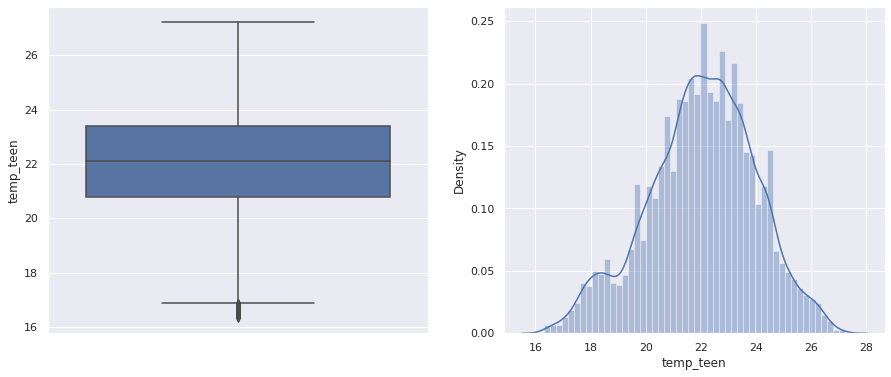

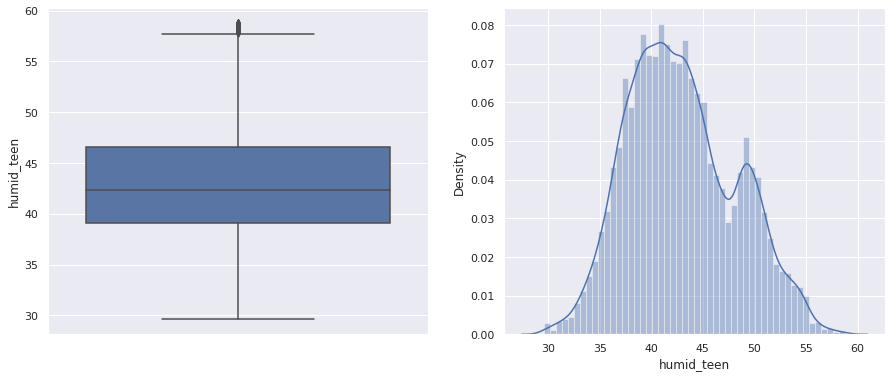

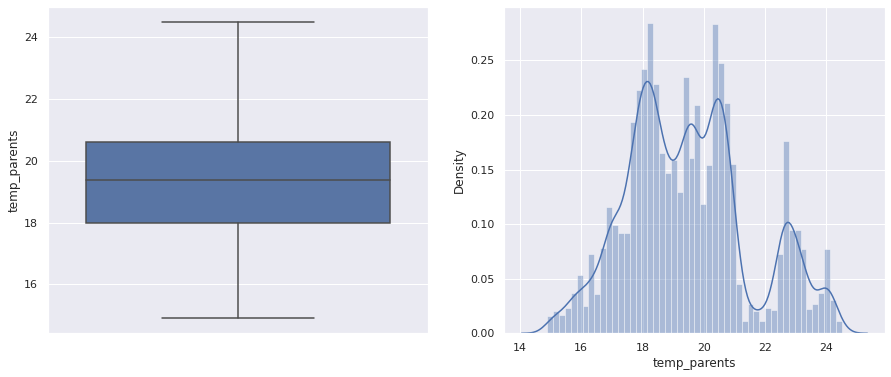

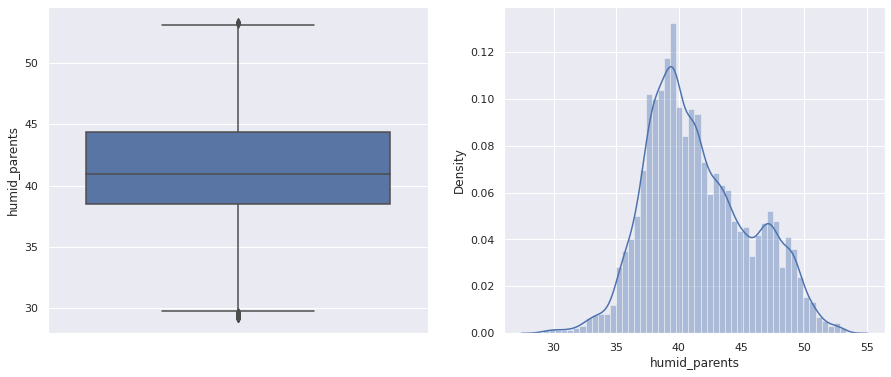

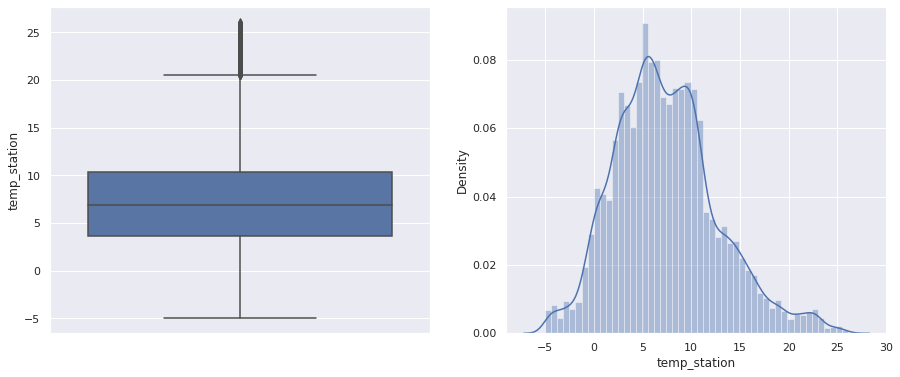

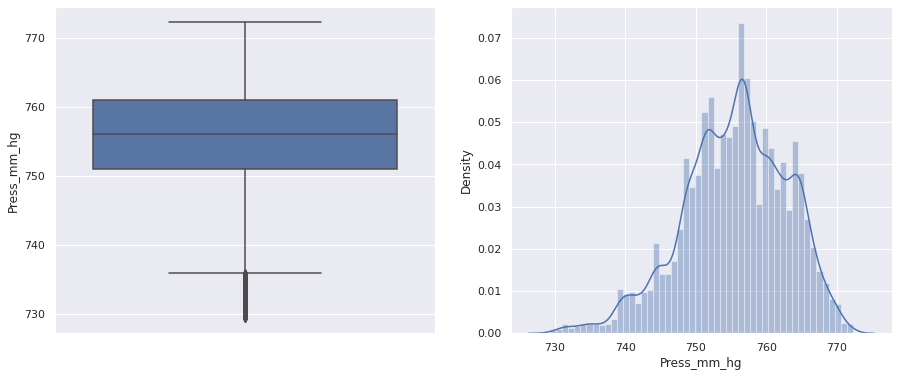

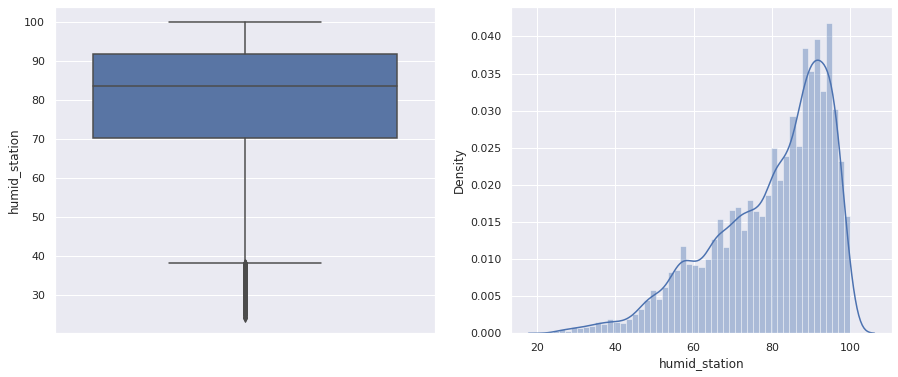

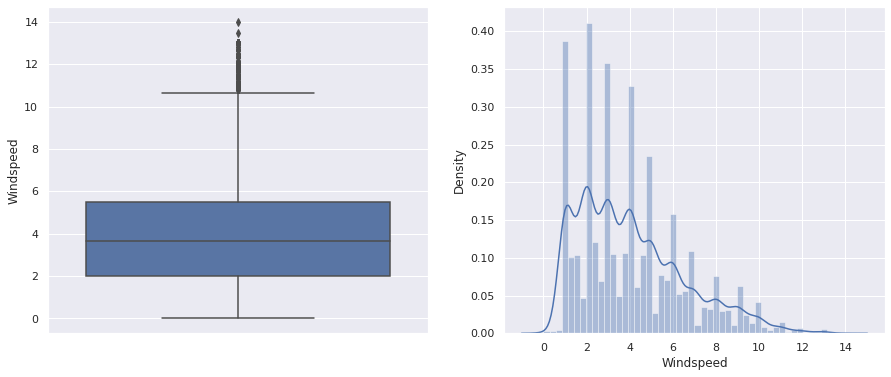

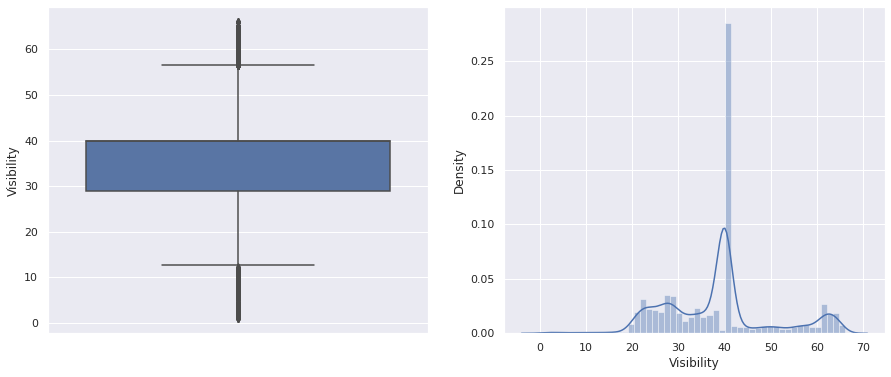

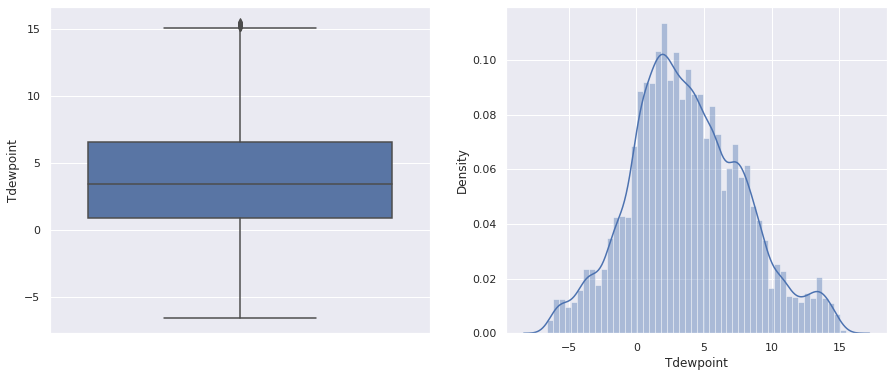

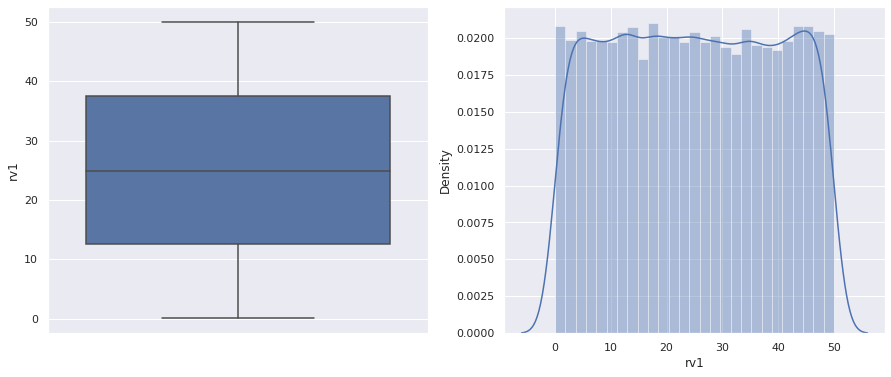

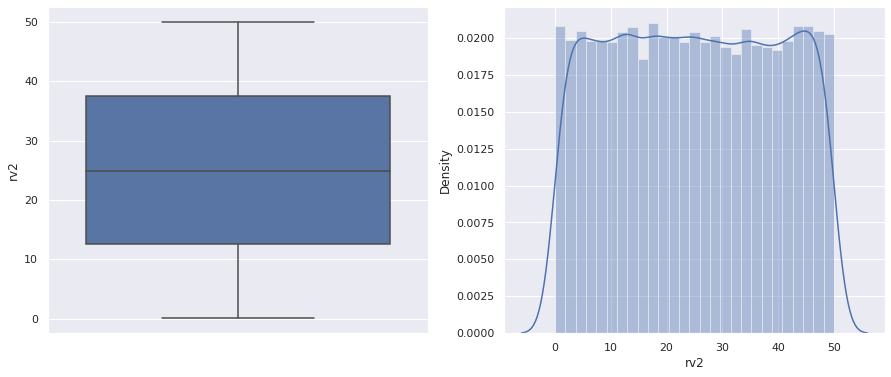

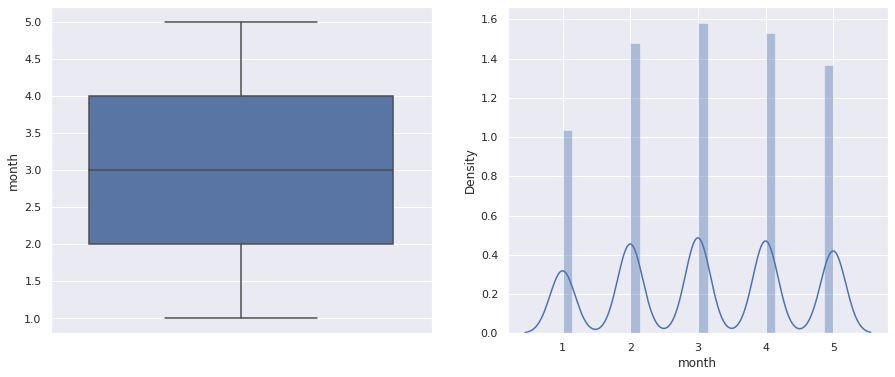

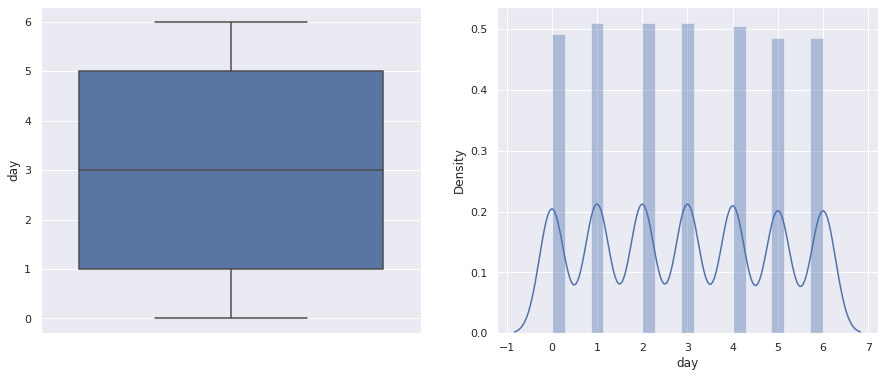

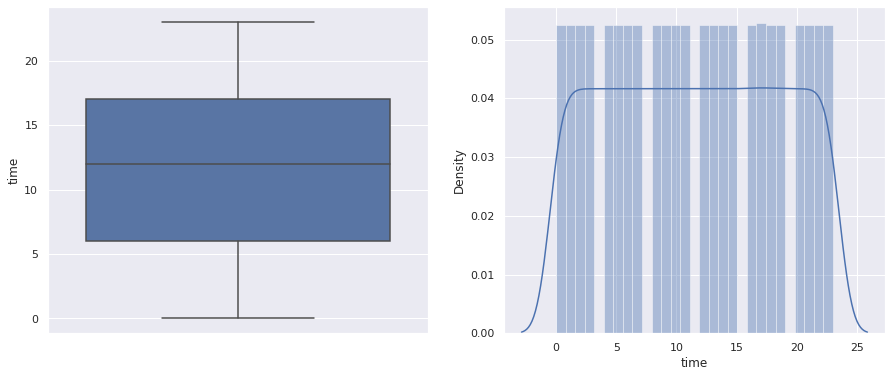

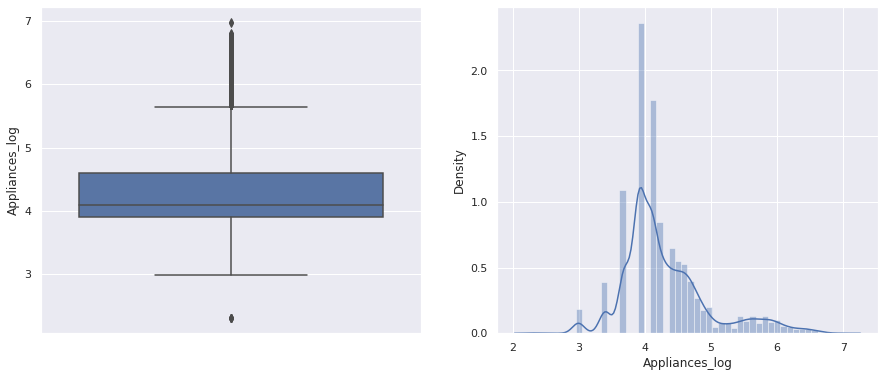

In [ ]:
for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=energyP_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(energyP_df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##**Observations based on distribution plot**
1. All humidity values except humid_outside and humid_station follow a Normal distribution, i.e., all the readings from sensors inside the home are from a Normal distribution.
2. Similarly, all temperature readings follow a Normal distribution except for temp_parents.
3. Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
4. The random variables rv1 and rv2 have more or less the same values for all the recordings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e9809ac90>,
      dtype=object)

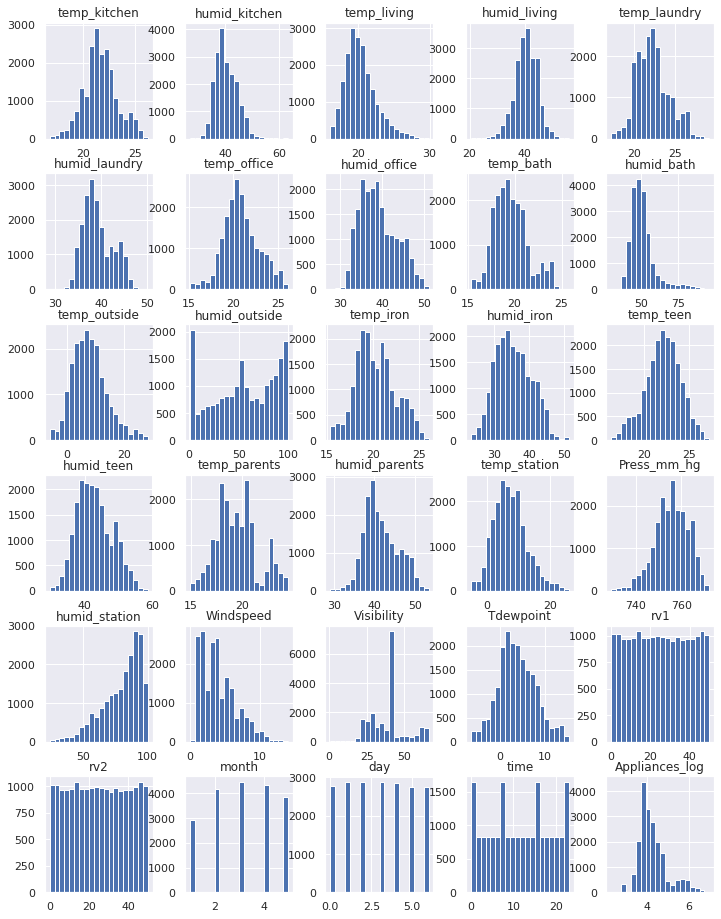

In [ ]:
# Histogram of all the features to understand the distribution
energyP_df.hist(bins = 20 , figsize= (12,16))

##**Lets check correlation of dependent and independent variables**

In [ ]:
label=energyP_df['Appliances_log']

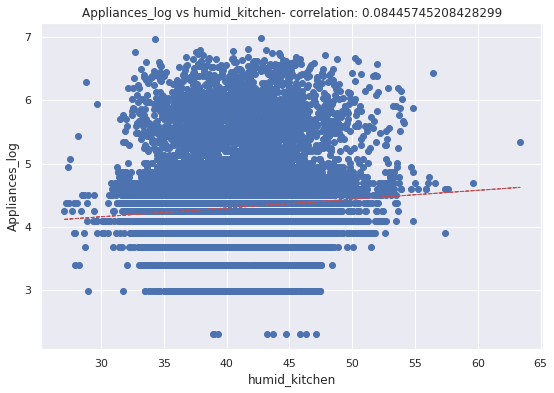

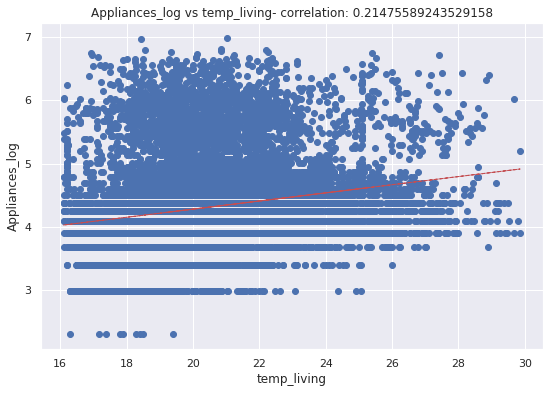

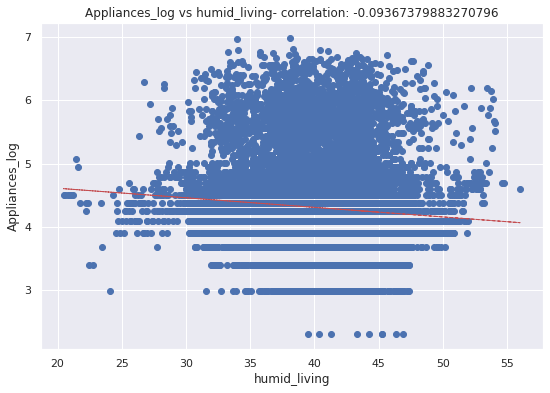

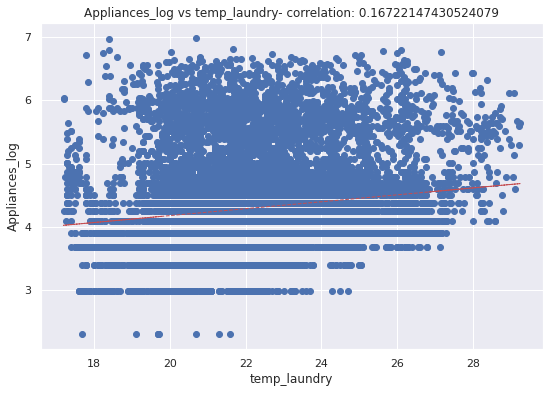

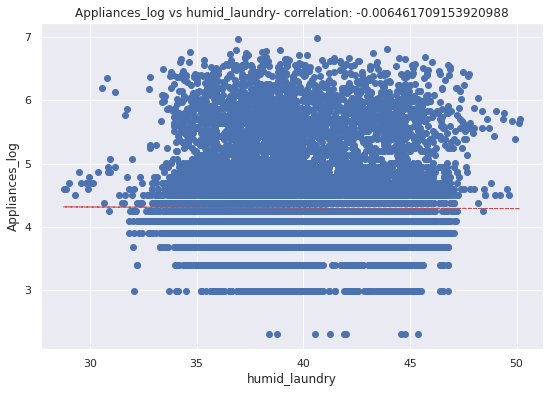

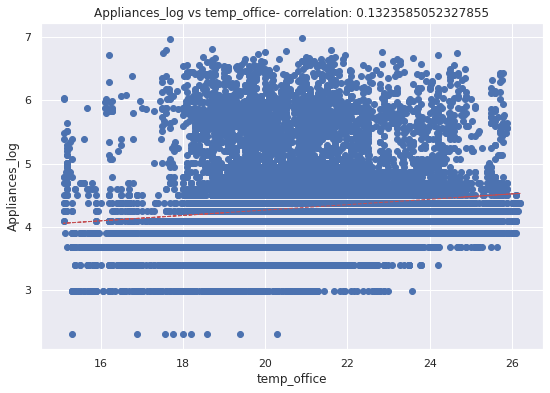

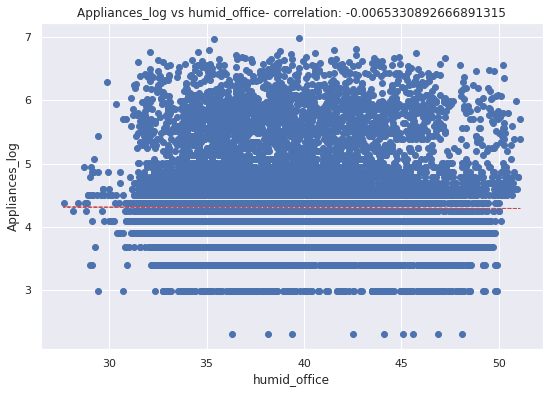

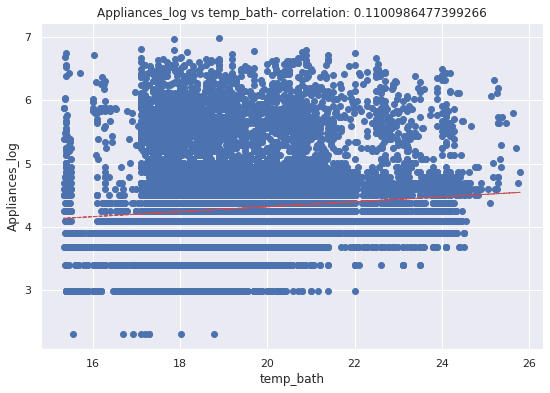

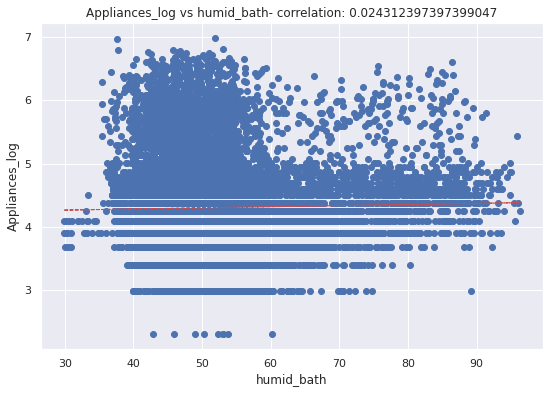

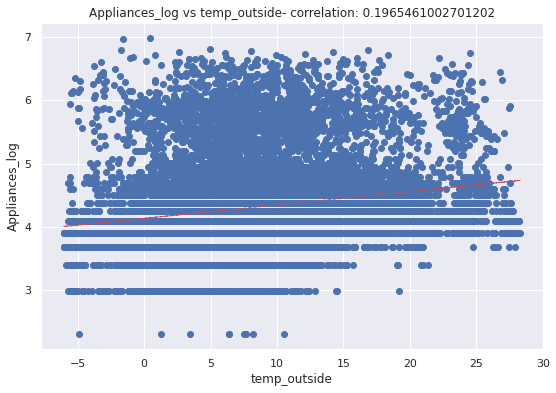

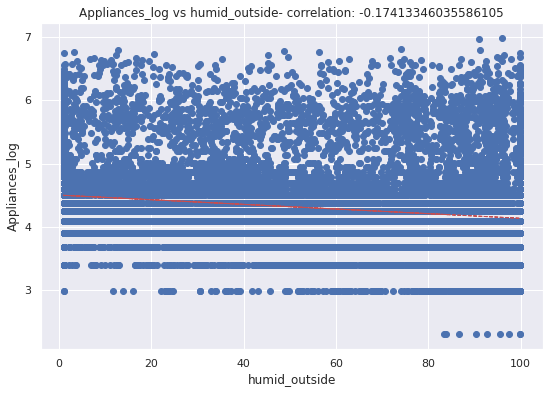

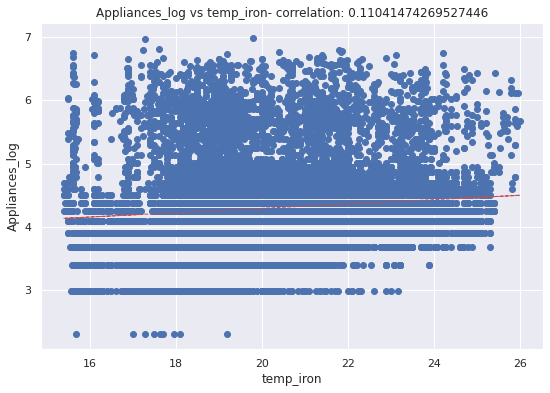

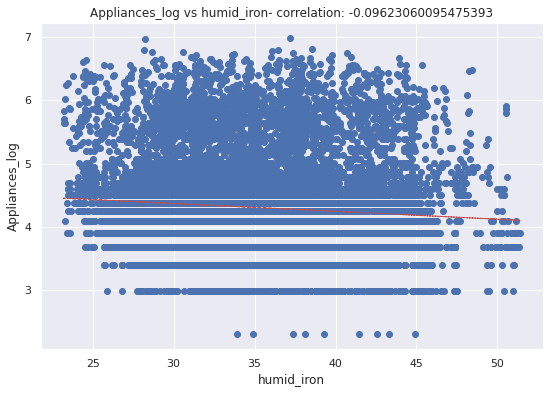

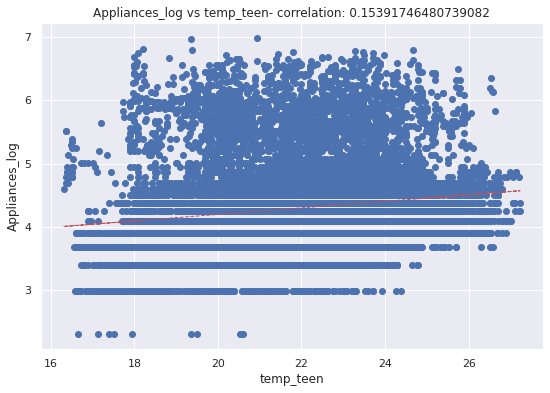

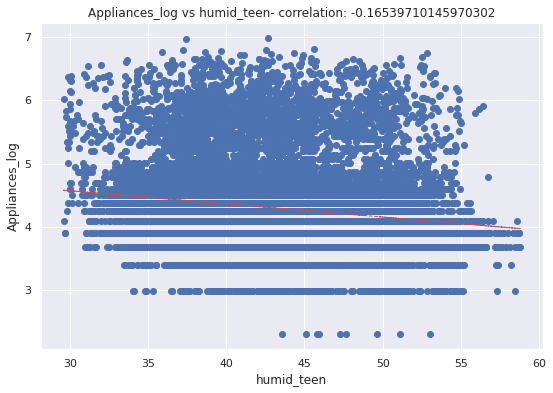

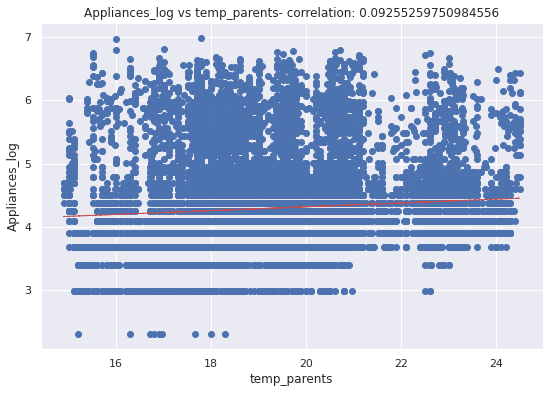

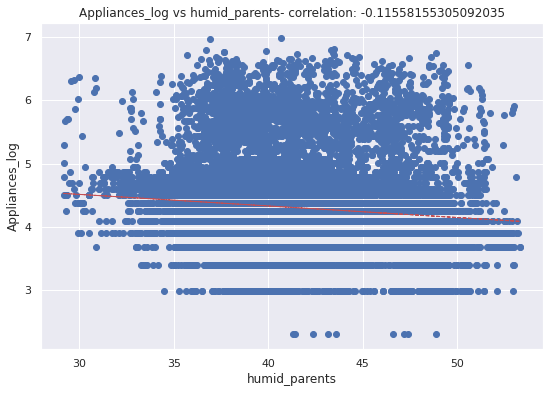

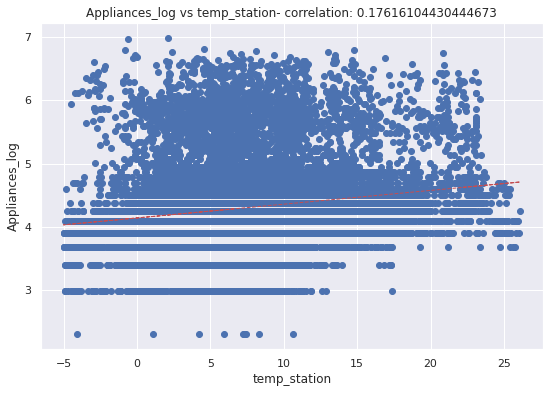

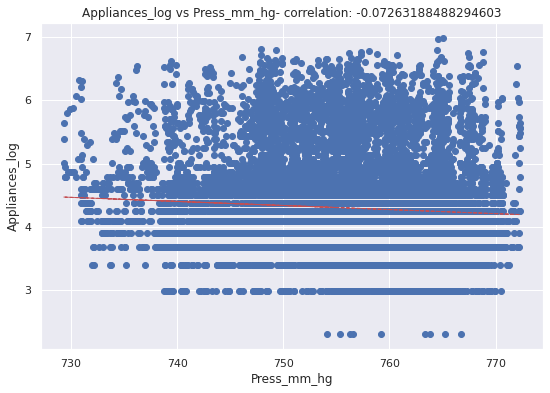

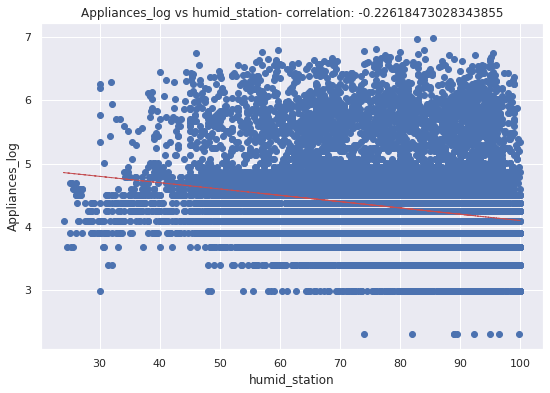

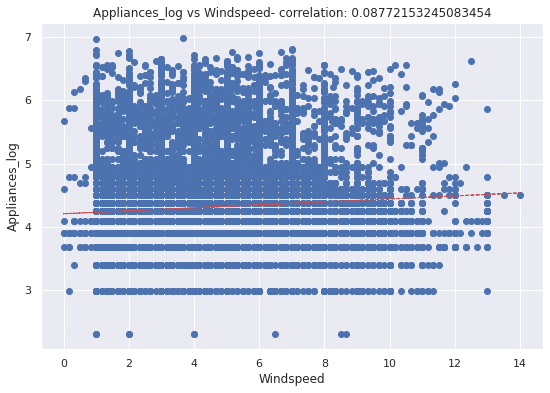

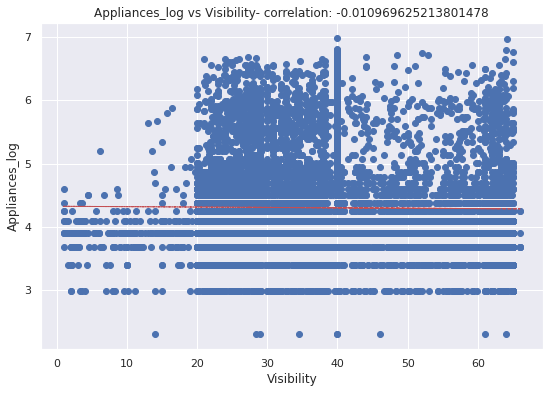

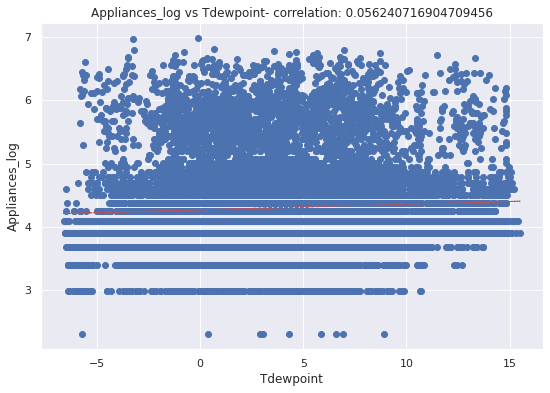

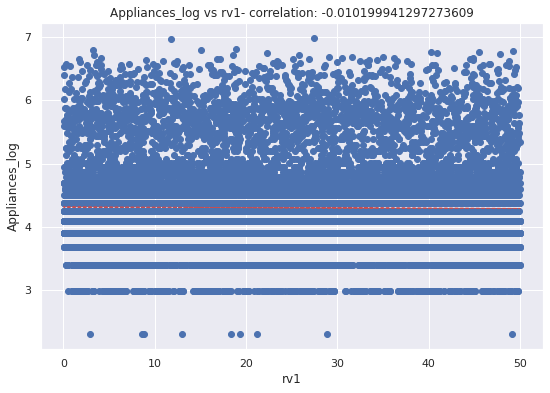

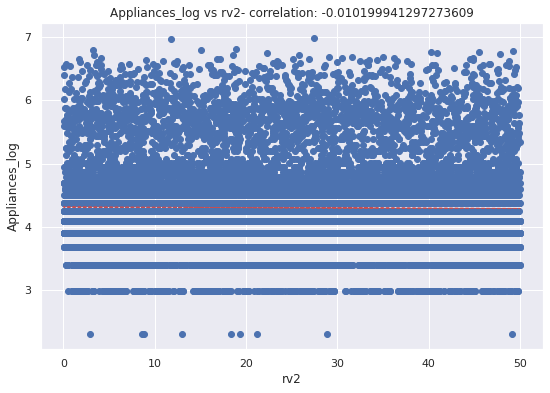

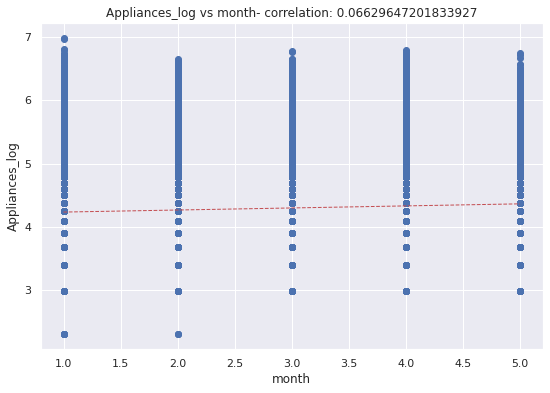

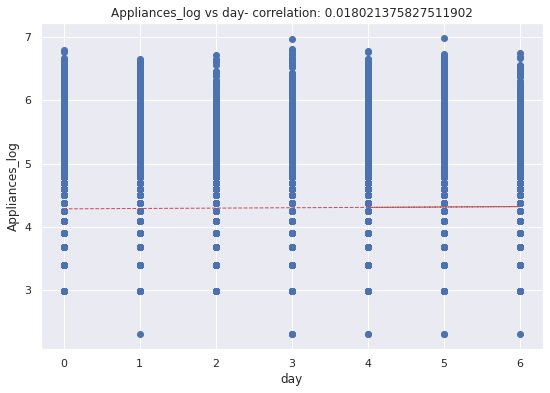

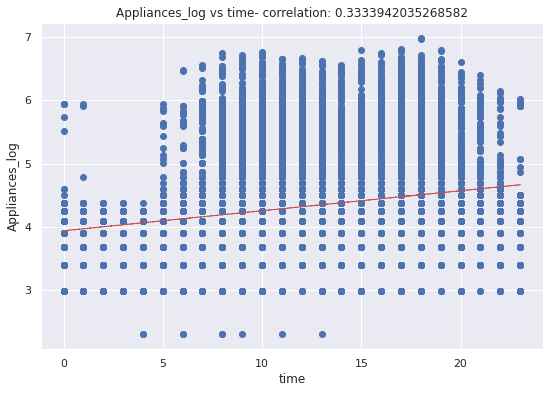

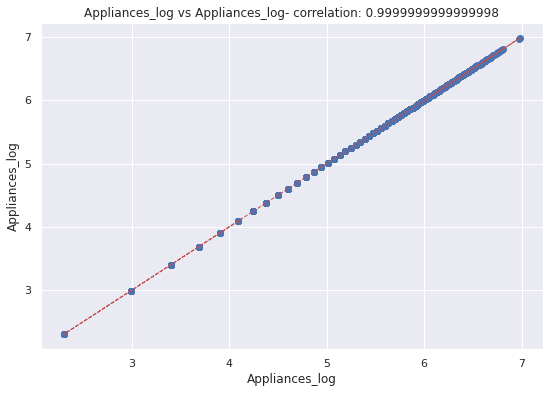

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energyP_df[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances_log')
    ax.set_title('Appliances_log vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(energyP_df[col], energyP_df['Appliances_log'], 1)
    y_hat = np.poly1d(z)(energyP_df[col])

    plt.plot(energyP_df[col], y_hat, "r--", lw=1)

plt.show()

## from above bivariat plot We can see that none of the independent variables is highly correlated

In [ ]:
def create_session(x):
  if x <= 6 or x >= 22:
    return 1
  elif x>6 and x <=15:
    return 2
  else:
    return 3

In [ ]:
# lets create a new column based on our observations
energyP_df['session'] = energyP_df['time'].apply(lambda x : create_session(x))

In [ ]:
energyP_df.head()

date  Appliances  lights     T1  ...  day  day_name  time  session
0 2016-01-11 17:00:00          60      30  19.89  ...    0    Monday    17        3
1 2016-01-11 17:10:00          60      30  19.89  ...    0    Monday    17        3
2 2016-01-11 17:20:00          50      30  19.89  ...    0    Monday    17        3
3 2016-01-11 17:30:00          50      40  19.89  ...    0    Monday    17        3
4 2016-01-11 17:40:00          60      40  19.89  ...    0    Monday    17        3

[5 rows x 34 columns]

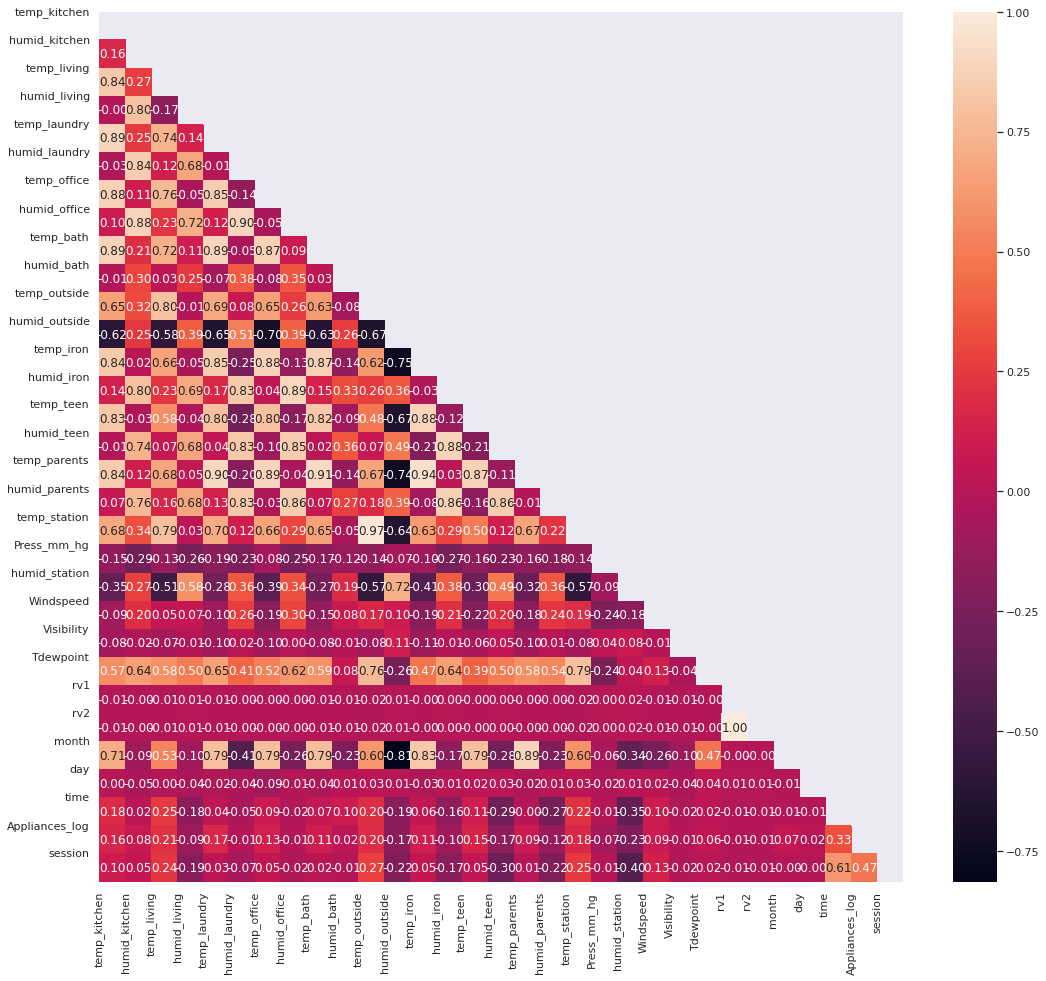

In [ ]:
# correlation matrix
corr = energyP_df.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(18, 16))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

##None of the variables are highly correlated with the target variable.


##Correlations between indoor temperature and humidity is high as expected.

##temp_outside and temp_station have a correlation of 0.97 - both are the outside temperatures. Hence we need not consider both the variables.

##Similary humid_outside and humid_station are outside humidity. Hence they have a high positive correlation of 0.7.

##humid_outside has a negative correlation with the indoor temperatures and also outdoor temperature. This is expected as temperature and relative humidity are expected to be inversely proportional

##Random variables have no role to play
## day and time is also don't have high correlation with any variable.

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(energyP_df, 40))

Top Absolute Correlations
rv1            rv2              1.000000
temp_outside   temp_station     0.974787
temp_iron      temp_parents     0.944776
temp_bath      temp_parents     0.911055
temp_laundry   temp_parents     0.901324
humid_laundry  humid_office     0.898978
humid_office   humid_iron       0.894301
temp_kitchen   temp_laundry     0.892402
temp_parents   month            0.890605
temp_office    temp_parents     0.889439
temp_laundry   temp_bath        0.888169
temp_kitchen   temp_bath        0.885247
humid_iron     humid_teen       0.883984
temp_iron      temp_teen        0.882123
humid_kitchen  humid_office     0.880359
temp_office    temp_iron        0.877763
temp_kitchen   temp_office      0.877001
temp_office    temp_bath        0.871813
temp_bath      temp_iron        0.870624
temp_teen      temp_parents     0.869338
humid_iron     humid_parents    0.858686
humid_office   humid_parents    0.856591
humid_teen     humid_parents    0.855812
temp_laundry   temp_office     

##**Lets try to find components that could explain maximum variance, which might improve the correlation with target variable as well.**

#**PCA**
##Before doing PCA, I need to split the data into train and test, and fit PCA on train set

In [ ]:
# spliting data into train and test
train_energy_df, test_energy_df = train_test_split(energyP_df, test_size=0.2, random_state=1)


##**PCA on temperatures**

In [ ]:
temp_cols = list(set(list(temp_dict.values())) - {'temp_outside', 'temp_station'})

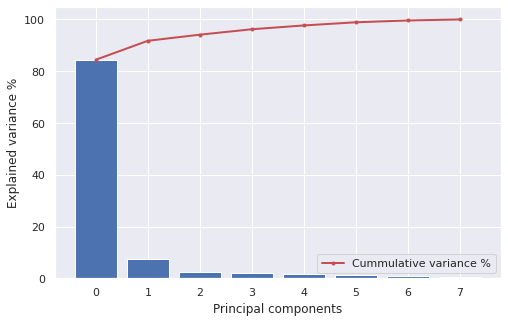

In [ ]:
# PCA on temperature
pca = PCA()
pca.fit(train_energy_df[temp_cols])
temp_pca = pca.transform(energyP_df[temp_cols])
variance = pca.explained_variance_ratio_*100
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.bar(range(len(variance)), variance)
ax.plot(range(len(variance)), np.cumsum(variance),'r.-',linewidth=2, label='Cummulative variance %')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance %')
plt.legend(loc='best')

In [ ]:
variance

array([84.42749838,  7.33014216,  2.3562388 ,  2.09550508,  1.47195967,
        1.21891325,  0.69977714,  0.39996553])

**First two components seem to explain more than 91 % of variance in data.**




In [ ]:
for i in range(temp_pca.shape[1]):
  energyP_df[f'temp_pca{i+1}'] = temp_pca[:,i]

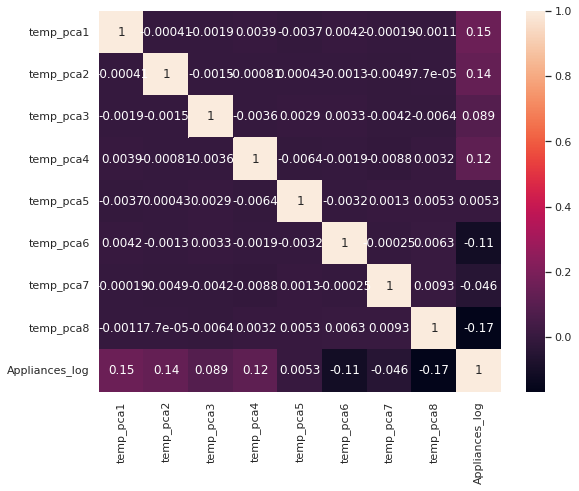

In [ ]:
# heatmap after PCA
fig,ax = plt.subplots(1,1,figsize=(9,7))
sns.heatmap(energyP_df[['temp_pca1', 'temp_pca2', 'temp_pca3', 'temp_pca4','temp_pca5', 'temp_pca6', 'temp_pca7', 'temp_pca8', 'Appliances_log']].corr(), ax = ax, annot=True)

In [ ]:
#Lets look at components of temp_pca8
dict(zip(temp_cols, pca.components_[7,:]))

{'temp_bath': -0.2173285515914479,
 'temp_iron': -0.24026540991588446,
 'temp_kitchen': 0.6252020918393114,
 'temp_laundry': -0.2968959599105867,
 'temp_living': -0.1173630470398795,
 'temp_office': -0.09845473026092916,
 'temp_parents': 0.6025874320322218,
 'temp_teen': -0.1715719523850323}

##**PCA on humidity**


In [ ]:
humid_cols = list(set(list(humid_dict.values())) - {'humid_outside', 'humid_station'})

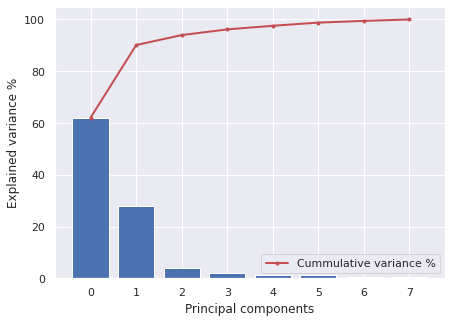

In [ ]:
pca = PCA()
pca.fit(train_energy_df[humid_cols])
humid_pca = pca.transform(energyP_df[humid_cols])
variance = pca.explained_variance_ratio_*100
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.bar(range(len(variance)), variance)
ax.plot(range(len(variance)), np.cumsum(variance),'r.-',linewidth=2, label='Cummulative variance %')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance %')
plt.legend(loc='best')

In [ ]:
variance

array([62.09137315, 28.02035975,  3.84761759,  2.19313449,  1.40502588,
        1.22143306,  0.64956943,  0.57148664])

**Similar to temperature first two components seem to explain more than 91 % of variance in data.**


In [ ]:
for i in range(humid_pca.shape[1]):
  energyP_df[f'humid_pca{i+1}'] = humid_pca[:,i]

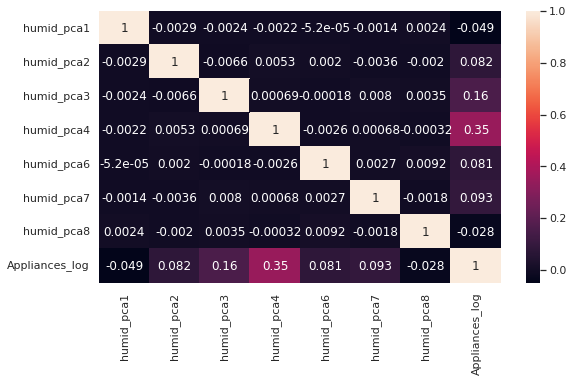

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.heatmap(energyP_df[['humid_pca1', 'humid_pca2', 'humid_pca3', 'humid_pca4', 'humid_pca6', 'humid_pca7', 'humid_pca8', 'Appliances_log']].corr(), ax = ax, annot=True)

In [ ]:
#Lets look at components of humid_pca4

dict(zip(humid_cols, pca.components_[3,:]))


{'humid_bath': -0.005052352457213847,
 'humid_iron': 0.07897694512980497,
 'humid_kitchen': 0.4123122284268883,
 'humid_laundry': 0.2908803708815087,
 'humid_living': -0.5395785231761474,
 'humid_office': 0.4102126219725881,
 'humid_parents': -0.018904279237057748,
 'humid_teen': -0.5285334448509869}

In [ ]:
# final features after PCA
final_features = ['temp_pca1', 'temp_pca2', 'humid_pca1', 'humid_pca2', 'temp_outside', 'humid_outside', 'day','session', 'Windspeed', 'Press_mm_hg', 'Appliances_log']

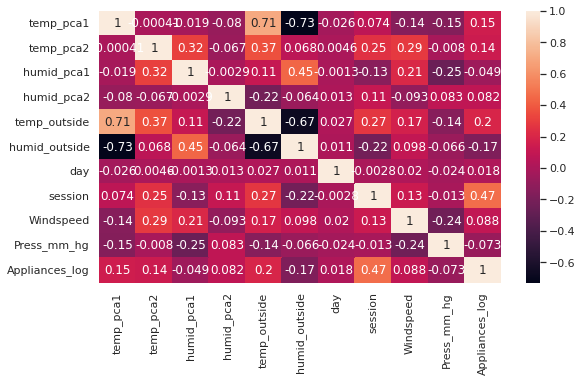

In [ ]:
# correlation map with final  features
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.heatmap(energyP_df[final_features].corr(), ax = ax, annot=True)

#**Model Implemented**

#We will be looking at following Algorithms:

#**Improved Linear regression models**

**1.Ridge regression**

**2.Lasso regression**

#**Support vector regression**

#**K Nearest NeighborsRegressor**

#**Random Forest Regressor** 

#**Extra Tree Regressor** 

#**Gradient Boosting Regressor** 

#**XGB Regressor** 

#**MLP Regressor**

#**Model Evaluation Technique**
##**GridSearchCV**
#**Model Evaluation Metrics**
##**R2_score**

##**Root Mean Square Error**



In [ ]:
# spliting data
final_train_df, final_test_df = train_test_split(energyP_df[final_features], test_size = 0.2, random_state = 1)


In [ ]:
X_train, y_train = final_train_df.drop('Appliances_log', axis=1), final_train_df['Appliances_log']
X_test, y_test = final_test_df.drop('Appliances_log', axis=1), final_test_df['Appliances_log']

In [ ]:
# scaling data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# scaling data
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

In [ ]:
# creating list of ML algorithms
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
# model fitting
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[16:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df  = pd.DataFrame(model_data)

In [ ]:
# result after fitting models
results_df

Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0                      Lasso:     0.015125  ...      -0.000805         1.024980
1                      Ridge:     0.002343  ...       0.248893         0.887956
2        KNeighborsRegressor:     0.036586  ...       0.635758         0.618352
3                         SVR:   17.150117  ...       0.400507         0.793291
4                RandomForest    12.823190  ...       0.706655         0.554919
5         ExtraTreeRegressor :    4.300269  ...       0.755092         0.507040
6  GradientBoostingRegressor:     4.258080  ...       0.366657         0.815380
7               XGBRegressor:     1.067288  ...       0.361215         0.818876
8               MLPRegressor:     7.846428  ...       0.446951         0.761943

[9 rows x 5 columns]

## Lasso and Ridge regression is worst performing model 
## But Tree regressor is giving highest accuracy as compare to other 
## Random Forest is giving second highest accuracy

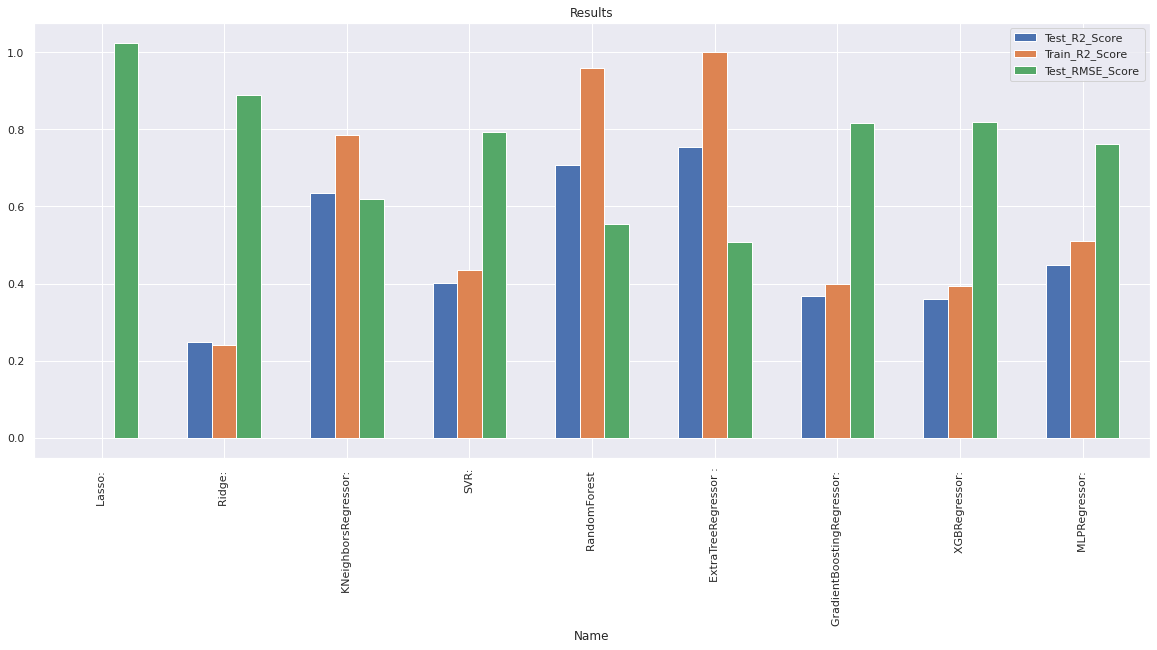

In [ ]:
# ploting
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))

#**OBSERVATIONS :**

##Extra Tree Regressor performs the best so far with a R2 score of 0.75 and RMSE of 0.50.
##Lasso regression is the worst performing model so far.

In [ ]:
#GridsearchCV hyperparameter tuning
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)

1.0

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

0.7524969405929456

In [ ]:
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

0.5097191252096197

##We observe a minute improvement in R2 score and RMSE score after hyper parameter tuning of Extra Trees Regressor.

Text(0.5, 0, 'Samples')

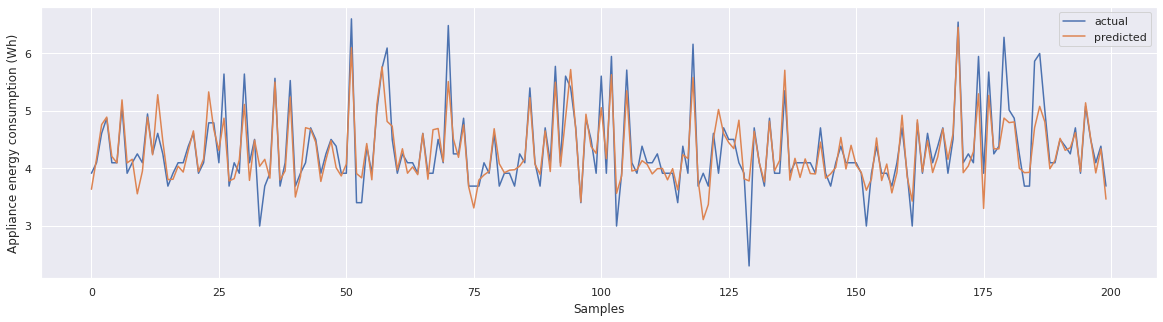

In [ ]:
#predicted vs actual plot
fig, axes = plt.subplots(1,1,figsize=(20,5))
plt.plot(range(len(y_test[:200])), y_test[:200]*sc_y.scale_ + sc_y.mean_, label='actual')
plt.plot(range(len(y_test[:200])), grid_search.best_estimator_.predict(X_test[:200,:])*sc_y.scale_ + sc_y.mean_, label='predicted')
plt.legend(loc='best')
plt.ylabel('Appliance energy consumption (Wh)')
plt.xlabel('Samples')


In [ ]:
grid_search.best_estimator_.feature_importances_

array([0.1048832 , 0.09235513, 0.09077956, 0.08819246, 0.09400246,
       0.08973112, 0.0621616 , 0.20216447, 0.0759989 , 0.09973111])

In [ ]:
 np.argsort(grid_search.best_estimator_.feature_importances_)[::-1]

array([7, 0, 9, 4, 1, 2, 5, 3, 8, 6])

In [ ]:
grid_search.best_estimator_.feature_importances_

array([0.1048832 , 0.09235513, 0.09077956, 0.08819246, 0.09400246,
       0.08973112, 0.0621616 , 0.20216447, 0.0759989 , 0.09973111])

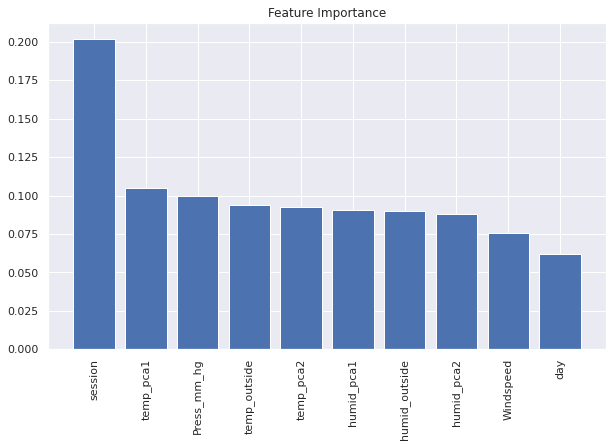

In [ ]:
# feature importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [final_train_df.columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

##**Looking at the feature importances, it is clear that the session features  is having higher feature importances compared to others. However almost all other features used for modelling hold equal importance**

#**Modeling Without PCA features**
###**Including all temperature and humidity features and engineered feature 'session' in our features set.**

In [ ]:
# All Features list
final_features = ['temp_laundry','temp_bath', 'temp_kitchen', 'temp_parents', 'temp_office', 'temp_living', 'temp_teen', 'temp_iron','humid_kitchen',
 'humid_office', 'humid_bath', 'humid_living', 'humid_parents', 'humid_laundry', 'humid_teen', 'humid_iron',
  'temp_outside', 'humid_outside', 'temp_station', 'humid_station', 'day', 'session', 'Windspeed', 'Press_mm_hg', 'Appliances_log']

In [ ]:
# spliting data
final_train_df, final_test_df = train_test_split(energyP_df[final_features], test_size = 0.2, random_state = 1)

In [ ]:
X_train, y_train = final_train_df.drop('Appliances_log', axis=1), final_train_df['Appliances_log']
X_test, y_test = final_test_df.drop('Appliances_log', axis=1), final_test_df['Appliances_log']

In [ ]:
# scaling data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# scaling data
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

In [ ]:
# fitting models without PCA
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[17:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df = pd.DataFrame(model_data)

In [ ]:
results_df

Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0                      Lasso:     0.014825  ...      -0.000805         1.024980
1                      Ridge:     0.009933  ...       0.315319         0.847783
2        KNeighborsRegressor:     0.001460  ...       0.649530         0.606550
3                         SVR:   18.586124  ...       0.482636         0.736951
4                RandomForest    30.410921  ...       0.724392         0.537882
5         ExtraTreeRegressor :    8.599947  ...       0.755754         0.506354
6  GradientBoostingRegressor:     8.120710  ...       0.418454         0.781327
7               XGBRegressor:     1.705197  ...       0.416447         0.782674
8               MLPRegressor:    14.028958  ...       0.533637         0.699685

[9 rows x 5 columns]

## Similar to PCA model, here worst performing model is Lasso
## and Extra Tree Regressor is giving highest accuracy


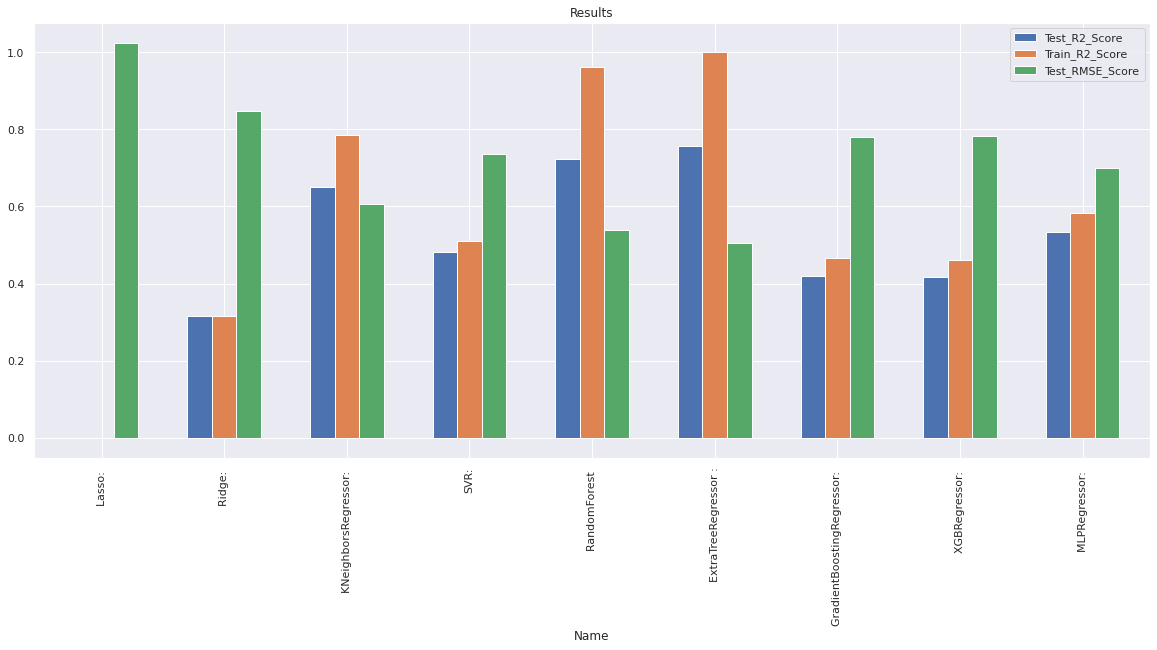

In [ ]:
#ploting graph
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))


##**The model results are almost similar to that observed in models trained with PCA feature set.**



In [ ]:
## hyper paramerter tuning 
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [ ]:
grid_search.best_estimator_


ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)


1.0

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)


0.7591153062868025

In [ ]:
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))


0.5028578633709906

## this model is almost similar to PCA model
## after hyperparameter tuning giving almost same result

In [ ]:
X_test = pd.DataFrame(X_test, columns=final_features[:-1])
y_test = pd.Series(y_test, name = 'Appliances_log')

Text(0.5, 0, 'Samples')

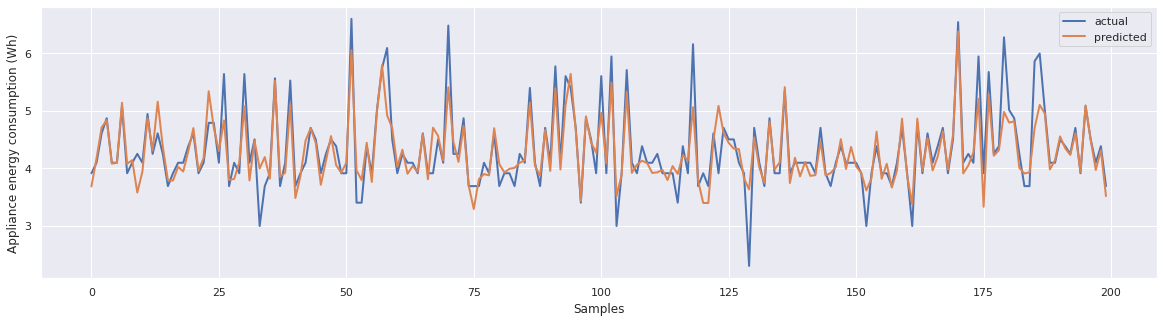

In [ ]:
# actual vs predicted graph
fig, axes = plt.subplots(1,1,figsize=(20,5))
plt.plot(range(len(y_test[:200])), y_test[:200]*sc_y.scale_ + sc_y.mean_, label='actual',linewidth=2)
plt.plot(range(len(y_test[:200])), grid_search.best_estimator_.predict(X_test.iloc[:200,:])*sc_y.scale_ + sc_y.mean_, label='predicted',linewidth=2)
plt.legend(loc='best')
plt.ylabel('Appliance energy consumption (Wh)')
plt.xlabel('Samples')

##The above figure represents actual and predicted values of 200 samples in test set.

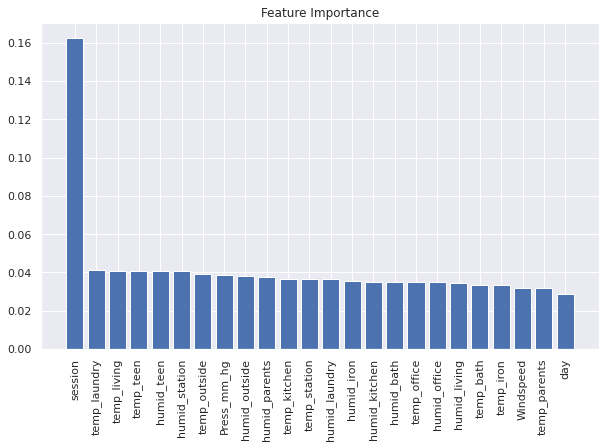

In [ ]:
# feature importance without PCA
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [final_train_df.columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

##**similar to PCA model , the feature importances without PCA  is clear that the session features is having higher feature importances compared to others. However almost all other features used for modelling hold equal importance**